In [1]:
from scipy.io import loadmat
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

In [ ]:
from scipy.io import loadmat
import numpy as np
import pandas as pd

mat_data = loadmat('/zebra/HCP_data_task/WM_LR.mat')
task_id = mat_data['task_IDs']
unique_task_IDs = np.unique(task_id)
print(len(unique_task_IDs))
# unique_task_IDs = pd.DataFrame(unique_task_IDs)
# np.savetxt('/data/dzy/combined_method/HCP/label.csv', unique_task_IDs, fmt='%d')

age = pd.read_csv('/data/dzy/combined_method/HCP/age.csv')
age_590 = []
for task_ID in unique_task_IDs:
    indices = age[age['subject_id'] == task_ID]
#     print(indices)
    age_590.append(indices)

age_590 = pd.concat(age_590, ignore_index=True)
print(age_590)
age_590.to_csv(f'/data/dzy/combined_method/HCP/age.csv',index=False)

590
     subject_id  age
0        100206   27
1        100307   27
2        101006   35
3        101107   22
4        101309   29
..          ...  ...
479      992673   33
480      992774   35
481      993675   29
482      994273   30
483      996782   28

[484 rows x 2 columns]
590被试的行为数据已保存。


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

data1_LR = pd.read_csv('/data/dzy/combined_method/结合方法/results_LR_net/Dynamics_ALL.csv')
data1_LR = data1_LR.drop(['condition'], axis=1)
data1_LR = pd.DataFrame(data1_LR, dtype=float)
data1_RL = pd.read_csv('/data/dzy/combined_method/结合方法/results_RL_net/Dynamics_ALL.csv')
data1_RL = data1_RL.drop(['condition'], axis=1)
data1_RL = pd.DataFrame(data1_RL, dtype=float)
data_combined_method = pd.concat([data1_LR, data1_RL], ignore_index=True)
data_combined_method = data_combined_method.loc[:,[' Frequency of B1',' Frequency of B2',' Frequency of B3',' Frequency of B4',' Frequency of B5',' Frequency of B6',' Frequency of B7',' Frequency of B8',' Frequency of B9',' Frequency of B10',' Frequency of B11',' Frequency of B12']]

data2_LR = pd.read_csv('/data/dzy/combined_method/原始能量景观分析/results_LR/Dynamics_ALL.csv')
data2_LR = data2_LR.drop(['condition'], axis=1)
data2_LR = pd.DataFrame(data2_LR, dtype=float)
data2_RL = pd.read_csv('/data/dzy/combined_method/原始能量景观分析/results_RL/Dynamics_ALL.csv')
data2_RL = data2_RL.drop(['condition'], axis=1)
data2_RL = pd.DataFrame(data2_RL, dtype=float)
data_energy_landscape = pd.concat([data2_LR, data2_RL], ignore_index=True)
data_energy_landscape = data_energy_landscape.loc[:,[' Frequency of B1',' Frequency of B2',' Frequency of B3',' Frequency of B4']]


occ_data3 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_LR/dynamics_metrics/k_7/occupancies.csv',sep='\t')
# dt_data3 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_LR/dynamics_metrics/k_7/dwell_times.csv',sep='\t')
# trans_data3 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_LR/dynamics_metrics/k_7/transitions_probabilities.csv',sep='\t')
occ_data3 = occ_data3.drop(['subject_id','condition'], axis=1)
# dt_data3 = dt_data3.drop(['subject_id','condition'], axis=1)
# trans_data3 = trans_data3.drop(['subject_id','condition'], axis=1)
# data3 = pd.concat([occ_data3,dt_data3,trans_data3], axis=1)
occ_data4 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_RL/dynamics_metrics/k_7/occupancies.csv',sep='\t')
# dt_data4 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_RL/dynamics_metrics/k_7/dwell_times.csv',sep='\t')
# trans_data4 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_RL/dynamics_metrics/k_7/transitions_probabilities.csv',sep='\t')
occ_data4 = occ_data4.drop(['subject_id','condition'], axis=1)
# dt_data4 = dt_data4.drop(['subject_id','condition'], axis=1)
# trans_data4 = trans_data4.drop(['subject_id','condition'], axis=1)
# data4 = pd.concat([occ_data4,dt_data4,trans_data4], axis=1)
# data_leida_roi = pd.concat([data3, data4], ignore_index=True)
data_leida_roi = pd.concat([occ_data3, occ_data4], ignore_index=True)

occ_data1 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_LR_net/dynamics_metrics/k_7/occupancies.csv',sep='\t')
# dt_data1 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_LR_net/dynamics_metrics/k_7/dwell_times.csv',sep='\t')
# trans_data1 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_LR_net/dynamics_metrics/k_7/transitions_probabilities.csv',sep='\t')
occ_data1 = occ_data1.drop(['subject_id','condition'], axis=1)
# dt_data1 = dt_data1.drop(['subject_id','condition'], axis=1)
# trans_data1 = trans_data1.drop(['subject_id','condition'], axis=1)
# data1 = pd.concat([occ_data1,dt_data1,trans_data1], axis=1)
occ_data2 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_RL_net/dynamics_metrics/k_7/occupancies.csv',sep='\t')
# dt_data2 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_RL_net/dynamics_metrics/k_7/dwell_times.csv',sep='\t')
# trans_data2 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_RL_net/dynamics_metrics/k_7/transitions_probabilities.csv',sep='\t')
occ_data2 = occ_data2.drop(['subject_id','condition'], axis=1)
# dt_data2 = dt_data2.drop(['subject_id','condition'], axis=1)
# trans_data2 = trans_data2.drop(['subject_id','condition'], axis=1)
# data2 = pd.concat([occ_data2,dt_data2,trans_data2], axis=1)
# data_leida_net = pd.concat([data1, data2], ignore_index=True)
data_leida_net = pd.concat([occ_data1, occ_data2], ignore_index=True)

Y=pd.read_csv('/data/dzy/combined_method/label.csv')
y = Y.iloc[:,0]
y_extended = pd.concat([y, y], ignore_index=True)

Y2=pd.read_csv('/data/dzy/combined_method/label2.csv')
y2 = Y2.iloc[:,0]
y_extended2 = pd.concat([y2, y2], ignore_index=True)

5310


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import numpy as np

model_combined = RandomForestClassifier(n_estimators=100, random_state=52)

kf = KFold(n_splits=10, shuffle=True, random_state=52)

class_accuracies_CM = []

for train_index, test_index in kf.split(data_combined_method):
    X_train, X_test = data_combined_method.iloc[train_index], data_combined_method.iloc[test_index]
    y_train, y_test = y_extended.iloc[train_index], y_extended.iloc[test_index]
    
    model_combined.fit(X_train, y_train)
    
    y_pred = model_combined.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    class_accuracies_cm = {}
    for i, class_name in enumerate(np.unique(y_train)):
        true_positives = conf_matrix[i, i]
        predicted_positives = conf_matrix[:, i].sum()
        class_accuracy = true_positives / predicted_positives if predicted_positives > 0 else 0
        class_accuracies_cm[class_name] = class_accuracy
    
    class_accuracies_CM.append(class_accuracies_cm)
    
class_accuracies_NET = []

for train_index, test_index in kf.split(data_leida_net):
    X_train, X_test = data_leida_net.iloc[train_index], data_leida_net.iloc[test_index]
    y_train, y_test = y_extended2.iloc[train_index], y_extended2.iloc[test_index]
    
    model_combined.fit(X_train, y_train)
    
    y_pred = model_combined.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)

    class_accuracies_net = {}
    for i, class_name in enumerate(np.unique(y_train)):
        true_positives = conf_matrix[i, i]
        predicted_positives = conf_matrix[:, i].sum()
        class_accuracy = true_positives / predicted_positives if predicted_positives > 0 else 0
        class_accuracies_net[class_name] = class_accuracy
    
    class_accuracies_NET.append(class_accuracies_net)
    
class_accuracies_ROI = []

for train_index, test_index in kf.split(data_leida_roi):
    X_train, X_test = data_leida_roi.iloc[train_index], data_leida_roi.iloc[test_index]
    y_train, y_test = y_extended2.iloc[train_index], y_extended2.iloc[test_index]

    model_combined.fit(X_train, y_train)
    
    y_pred = model_combined.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    class_accuracies_roi = {}
    for i, class_name in enumerate(np.unique(y_train)):
        true_positives = conf_matrix[i, i]
        predicted_positives = conf_matrix[:, i].sum()
        class_accuracy = true_positives / predicted_positives if predicted_positives > 0 else 0
        class_accuracies_roi[class_name] = class_accuracy
    
    class_accuracies_ROI.append(class_accuracies_roi)

class_accuracies_EL = []

for train_index, test_index in kf.split(data_energy_landscape):
    X_train, X_test = data_energy_landscape.iloc[train_index], data_energy_landscape.iloc[test_index]
    y_train, y_test = y_extended.iloc[train_index], y_extended.iloc[test_index]
    
    model_combined.fit(X_train, y_train)
    
    y_pred = model_combined.predict(X_test)
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    class_accuracies_el = {}
    for i, class_name in enumerate(np.unique(y_train)):
        true_positives = conf_matrix[i, i]
        predicted_positives = conf_matrix[:, i].sum()
        class_accuracy = true_positives / predicted_positives if predicted_positives > 0 else 0
        class_accuracies_el[class_name] = class_accuracy

    class_accuracies_EL.append(class_accuracies_el)

for fold_index, fold_accuracies in enumerate(class_accuracies_CM):
    print(f"Fold {fold_index + 1} Class Accuracies_cm:")
    for class_name, accuracy in fold_accuracies.items():
        print(f"Class {class_name}: {accuracy:.4f}")
    print("-" * 80)
for fold_index, fold_accuracies in enumerate(class_accuracies_NET):
    print(f"Fold {fold_index + 1} Class Accuracies_net:")
    for class_name, accuracy in fold_accuracies.items():
        print(f"Class {class_name}: {accuracy:.4f}")
    print("-" * 80)
for fold_index, fold_accuracies in enumerate(class_accuracies_ROI):
    print(f"Fold {fold_index + 1} Class Accuracies_roi:")
    for class_name, accuracy in fold_accuracies.items():
        print(f"Class {class_name}: {accuracy:.4f}")
    print("-" * 80)
for fold_index, fold_accuracies in enumerate(class_accuracies_EL):
    print(f"Fold {fold_index + 1} Class Accuracies_el:")
    for class_name, accuracy in fold_accuracies.items():
        print(f"Class {class_name}: {accuracy:.4f}")
    print("-" * 80)

Fold 1 Class Accuracies_cm:
Class 0: 0.8689
Class 1: 0.5946
Class 2: 0.5586
Class 3: 0.5048
Class 4: 0.6154
Class 5: 0.6083
Class 6: 0.6549
Class 7: 0.6356
--------------------------------------------------------------------------------
Fold 2 Class Accuracies_cm:
Class 0: 0.8898
Class 1: 0.4729
Class 2: 0.5981
Class 3: 0.4091
Class 4: 0.6587
Class 5: 0.6296
Class 6: 0.6508
Class 7: 0.6532
--------------------------------------------------------------------------------
Fold 3 Class Accuracies_cm:
Class 0: 0.8951
Class 1: 0.5935
Class 2: 0.5965
Class 3: 0.5128
Class 4: 0.7000
Class 5: 0.6033
Class 6: 0.6639
Class 7: 0.5812
--------------------------------------------------------------------------------
Fold 4 Class Accuracies_cm:
Class 0: 0.9084
Class 1: 0.5000
Class 2: 0.5508
Class 3: 0.5000
Class 4: 0.7358
Class 5: 0.5370
Class 6: 0.6855
Class 7: 0.6333
--------------------------------------------------------------------------------
Fold 5 Class Accuracies_cm:
Class 0: 0.8964
Class 1:

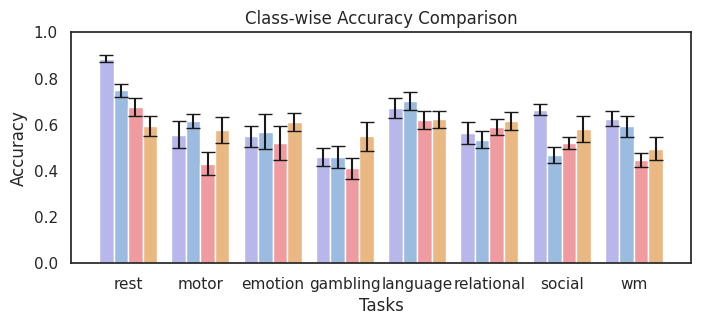

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

class_accuracies_CM = [

]

class_accuracies_NET = [

]

class_accuracies_ROI = [

]

class_accuracies_EL = [

]
classes = [0,1,2,3,4,5,6,7]  # List of category names
condition = ['rest','motor', 'emotion', 'gambling', 'language', 'relational', 'social', 'wm']
# Calculate the average accuracy rate and standard deviation
def calculate_mean_std(accuracies):
#     means = {i: np.mean(acc) for i, acc in accuracies.items()}
#     stds = {i: np.std(acc) for i, acc in accuracies.items()}
    means = [np.mean([acc_dict[class_name] for acc_dict in accuracies]) for class_name in classes]
    stds = [np.std([acc_dict[class_name] for acc_dict in accuracies]) for class_name in classes]
    return means, stds

mean_CM, std_CM = calculate_mean_std(class_accuracies_CM)
mean_NET, std_NET = calculate_mean_std(class_accuracies_NET)
mean_ROI, std_ROI = calculate_mean_std(class_accuracies_ROI)
mean_EL, std_EL = calculate_mean_std(class_accuracies_EL)


N = len(classes)  
ind = np.arange(N)  
width = 0.2  

fig, ax = plt.subplots(figsize=(8, 3))

ax.bar(ind - 3*width/2, mean_CM, width, yerr=std_CM, label='OURs',capsize=5, color='#B7B7EB')
ax.bar(ind - width/2, mean_ROI, width, yerr=std_ROI, label='LEiDA_roi',capsize=5, color='#9BBBE1')
ax.bar(ind + width/2, mean_NET, width, yerr=std_NET, label='LEiDA_net',capsize=5, color='#F09BA0')
ax.bar(ind + 3*width/2, mean_EL, width, yerr=std_EL, label='Energy_landscape',capsize=5, color='#EAB883')

ax.set_xlabel('Tasks')
ax.set_ylabel('Accuracy')
ax.set_title('Class-wise Accuracy Comparison')
ax.set_xticks(ind)
ax.set_xticklabels(condition)
ax.set_ylim([0,1])
# ax.legend()

plt.show()

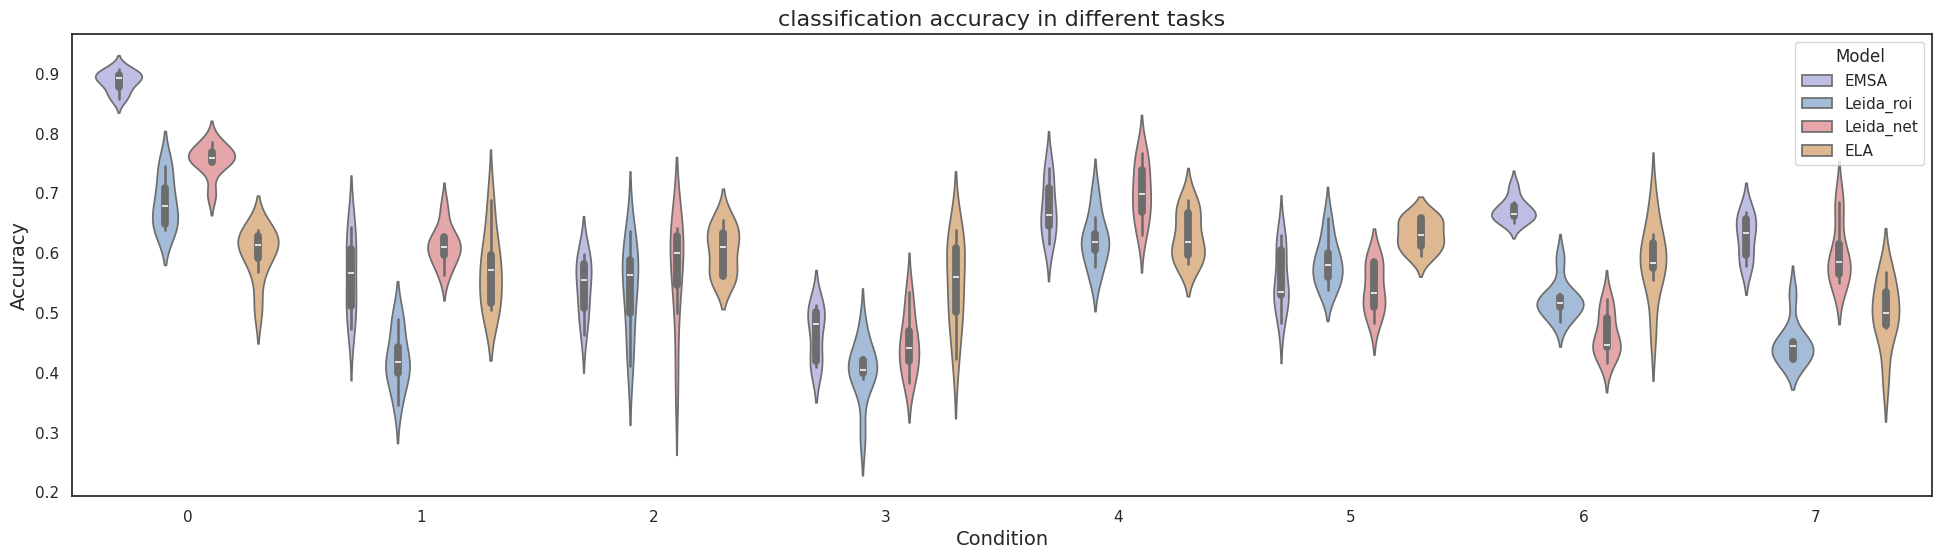

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conditions = ['rest', 'motor', 'emotion', 'gambling', 'language', 'relational', 'social', 'wm']
class_accuracies = {
    'EMSA': class_accuracies_CM,
    'Leida_roi': class_accuracies_ROI,
    'Leida_net': class_accuracies_NET,
    'ELA': class_accuracies_EL
}

results = []

# Traverse each condition and model, and organize the data
for condition, accuracies in zip(conditions, zip(class_accuracies_CM, class_accuracies_NET, class_accuracies_ROI, class_accuracies_EL)):
    for model_name, model_data in zip(class_accuracies.keys(), accuracies):
        for class_id, accuracy in model_data.items():
            results.append({
                'Condition': condition,
                'Model': model_name,
                'Class': class_id,
                'Accuracy': accuracy
            })
df = pd.DataFrame(results)

plt.figure(figsize=(24, 6))
colors=['#B7B7EB', '#9BBBE1', '#F09BA0', '#EAB883']
sns.violinplot(x='Class', y='Accuracy', hue='Model', data=df, palette = colors)

plt.title('classification accuracy in different tasks', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
# plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
plt.savefig('/data/dzy/combined_method/figure/accuracy_tasks.png',dpi=500)

In [ ]:
from sklearn.model_selection import cross_val_score

model_combined = RandomForestClassifier(n_estimators=100, random_state=52)
model_leida_net = RandomForestClassifier(n_estimators=100, random_state=52)
model_leida_roi = RandomForestClassifier(n_estimators=100, random_state=52)
model_energy = RandomForestClassifier(n_estimators=100, random_state=52)

acc_combined = cross_val_score(model_combined, data_combined_method, y_extended, cv=10,scoring='accuracy')
acc_leida_net = cross_val_score(model_leida_net, data_leida_net, y_extended2, cv=10,scoring='accuracy')
acc_leida_roi = cross_val_score(model_leida_roi,data_leida_roi, y_extended2, cv=10,scoring='accuracy')
acc_energy = cross_val_score(model_energy, data_energy_landscape, y_extended, cv=10,scoring='accuracy')

pre_combined = cross_val_score(model_combined, data_combined_method, y_extended, cv=10,scoring='precision_weighted')
pre_leida_net = cross_val_score(model_leida_net, data_leida_net, y_extended2, cv=10,scoring='precision_weighted')
pre_leida_roi = cross_val_score(model_leida_roi,data_leida_roi, y_extended2, cv=10,scoring='precision_weighted')
pre_energy = cross_val_score(model_energy, data_energy_landscape, y_extended, cv=10,scoring='precision_weighted')

recall_combined = cross_val_score(model_combined, data_combined_method, y_extended, cv=10,scoring='recall_weighted')
recall_leida_net = cross_val_score(model_leida_net, data_leida_net, y_extended2, cv=10,scoring='recall_weighted')
recall_leida_roi = cross_val_score(model_leida_roi,data_leida_roi, y_extended2, cv=10,scoring='recall_weighted')
recall_energy = cross_val_score(model_energy, data_energy_landscape, y_extended, cv=10,scoring='recall_weighted')

f1_combined = cross_val_score(model_combined, data_combined_method, y_extended, cv=10,scoring='f1_weighted')
f1_leida_net = cross_val_score(model_leida_net, data_leida_net, y_extended2, cv=10,scoring='f1_weighted')
f1_leida_roi = cross_val_score(model_leida_roi,data_leida_roi, y_extended2, cv=10,scoring='f1_weighted')
f1_energy = cross_val_score(model_energy, data_energy_landscape, y_extended, cv=10,scoring='f1_weighted')

# print("Combined Model CV Scores:", scores_combined)
# print("Leida Net Model CV Scores:", scores_leida_net)
# print("Leida ROI Model CV Scores:", scores_leida_roi)
# print("Energy Model CV Scores:", scores_energy)

/tmp/ipykernel_38916/3149829145.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Model', y='Accuracy', data=df, palette=colors)


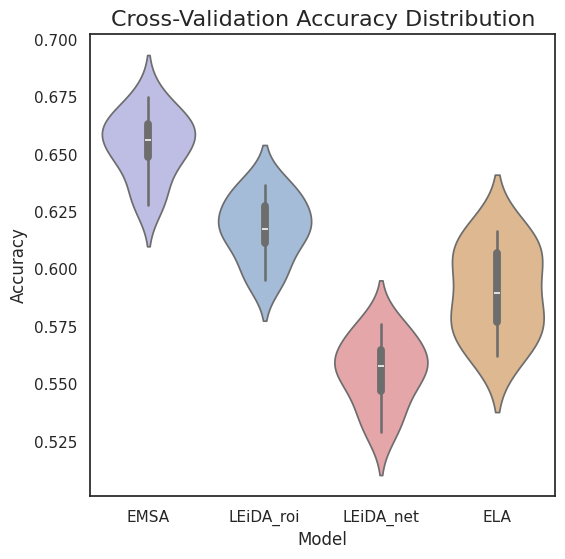

<Figure size 640x480 with 0 Axes>

In [ ]:
data = {
    'Model': ['EMSA'] * len(acc_combined) + ['LEiDA_roi'] * len(acc_leida_roi) +
             ['LEiDA_net'] * len(acc_leida_net) + ['ELA'] * len(acc_energy),
    'Accuracy': list(acc_combined) + list(acc_leida_roi) + list(acc_leida_net) + list(acc_energy)
}

df = pd.DataFrame(data)

sns.set(style="white")
colors=['#B7B7EB', '#9BBBE1', '#F09BA0', '#EAB883']
plt.figure(figsize=(6, 6))
sns.violinplot(x='Model', y='Accuracy', data=df, palette=colors)

plt.title('Cross-Validation Accuracy Distribution', fontsize=16)
# plt.xlabel('Model', fontsize=14)
# plt.ylabel('Accuracy', fontsize=14)

plt.show()
plt.savefig('/data/dzy/combined_method/figure/HCP_accuracy.png',dpi=500)

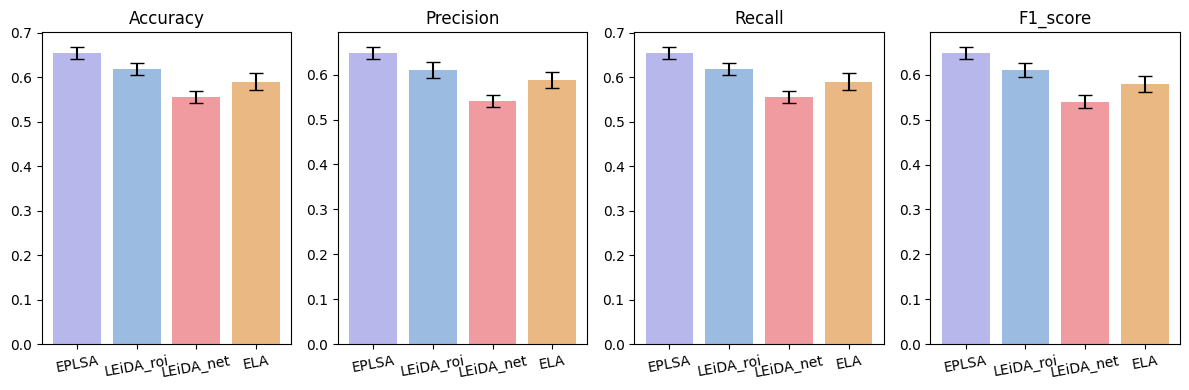

<Figure size 640x480 with 0 Axes>

In [ ]:
accuracies = [np.mean(scores) for scores in [acc_combined, acc_leida_roi, acc_leida_net, acc_energy]]
precisions = [np.mean(scores) for scores in [pre_combined, pre_leida_roi, pre_leida_net, pre_energy]]
recalls = [np.mean(scores) for scores in [recall_combined, recall_leida_roi, recall_leida_net, recall_energy]]
F1_scores = [np.mean(scores) for scores in [f1_combined, f1_leida_roi, f1_leida_net, f1_energy]]

std_accuracies = [np.std(scores) for scores in [acc_combined, acc_leida_roi, acc_leida_net, acc_energy]]
std_precision = [np.std(scores) for scores in [pre_combined, pre_leida_roi, pre_leida_net, pre_energy]]
std_recall = [np.std(scores) for scores in [recall_combined, recall_leida_roi, recall_leida_net, recall_energy]]
std_F1_score = [np.std(scores) for scores in [f1_combined, f1_leida_roi, f1_leida_net, f1_energy]]
# std_scores = [np.std(scores) for scores in [scores_combined, scores_leida_roi, scores_leida_net, scores_energy]]
methods = ['EPLSA', 'LEiDA_roi', 'LEiDA_net', 'ELA']
plt.figure(figsize=(12, 4))  
plt.subplot(1, 4, 1)  

plt.bar(methods, accuracies, color=['#B7B7EB', '#9BBBE1', '#F09BA0', '#EAB883'], yerr=std_accuracies, capsize=5)
plt.title('Accuracy')
plt.xticks(rotation=10) 
# plt.ylabel('Accuracy')
# for i, accuracy in enumerate(accuracies):
#     plt.text(i, accuracy + 0.01, f"{accuracy:.4f}", ha='center', va='bottom')

plt.subplot(1, 4, 2)  
plt.bar(methods, precisions, color=['#B7B7EB', '#9BBBE1', '#F09BA0', '#EAB883'], yerr=std_precision, capsize=5)
plt.title('Precision')
plt.xticks(rotation=10) 
# plt.ylabel('Accuracy')
# for i, precision in enumerate(precisions):
#     plt.text(i, precision + 0.01, f"{precision:.4f}", ha='center', va='bottom')
    
plt.subplot(1, 4, 3)  
plt.bar(methods, recalls, color=['#B7B7EB', '#9BBBE1', '#F09BA0', '#EAB883'], yerr=std_recall, capsize=5)
plt.title('Recall')
plt.xticks(rotation=10)  
# plt.ylabel('Accuracy')
# for i, recall in enumerate(recalls):
#     plt.text(i, recall + 0.01, f"{recall:.4f}", ha='center', va='bottom')  

plt.subplot(1, 4, 4)  
plt.bar(methods, F1_scores, color=['#B7B7EB', '#9BBBE1', '#F09BA0', '#EAB883'], yerr=std_F1_score, capsize=5)
plt.title('F1_score')
plt.xticks(rotation=10)  
# plt.ylabel('Accuracy')
# for i, F1_score in enumerate(F1_scores):
#     plt.text(i, F1_score + 0.01, f"{F1_score:.4f}", ha='center', va='bottom')      
    
plt.tight_layout() 
plt.show()
plt.savefig('/data/dzy/combined_method/figure/predict_performance.png',dpi = 500)

Combined Method Accuracy: 0.66
LEiDA_net Method Accuracy: 0.55
LEiDA_roi Method Accuracy: 0.61
Energy Landscape Method Accuracy: 0.57


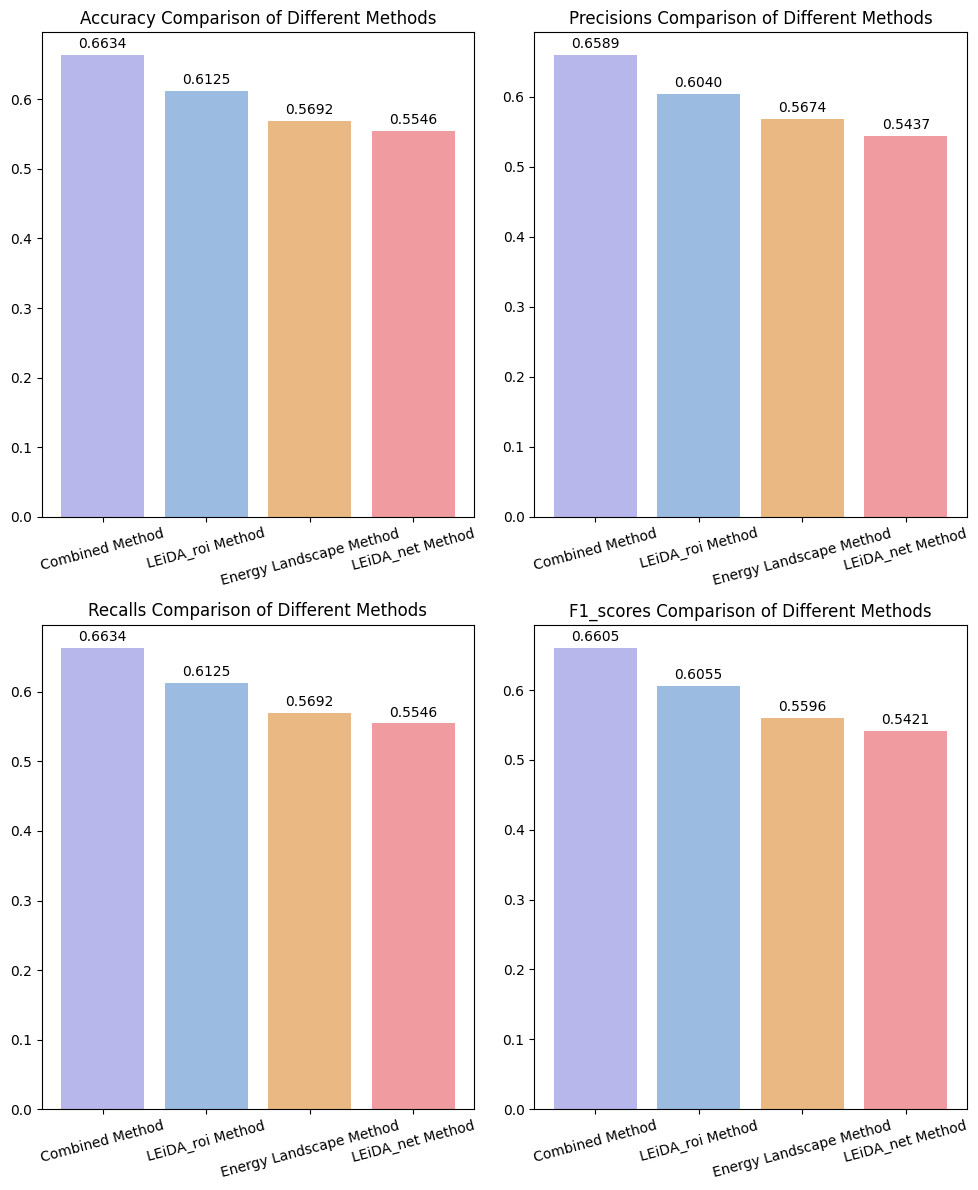

Confusion Matrix:
[[457   9   2   8  12   1   8  12]
 [  9 143  32  26  10  12  11  10]
 [  1  22 132  15   8  26  11   4]
 [  0  29  16  88  10  36   9  15]
 [  4  12  13  17 176   3  10  11]
 [  0   5  28  34   0 121   8  23]
 [ 10  14  20  10   7   9 139   7]
 [ 12  16   6  25  15  21  11 153]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.90      0.91       509
           1       0.57      0.57      0.57       253
           2       0.53      0.60      0.56       219
           3       0.39      0.43      0.41       203
           4       0.74      0.72      0.73       246
           5       0.53      0.55      0.54       219
           6       0.67      0.64      0.66       216
           7       0.65      0.59      0.62       259

    accuracy                           0.66      2124
   macro avg       0.63      0.63      0.63      2124
weighted avg       0.67      0.66      0.67      2124

Confusion Matrix:
[[395  4

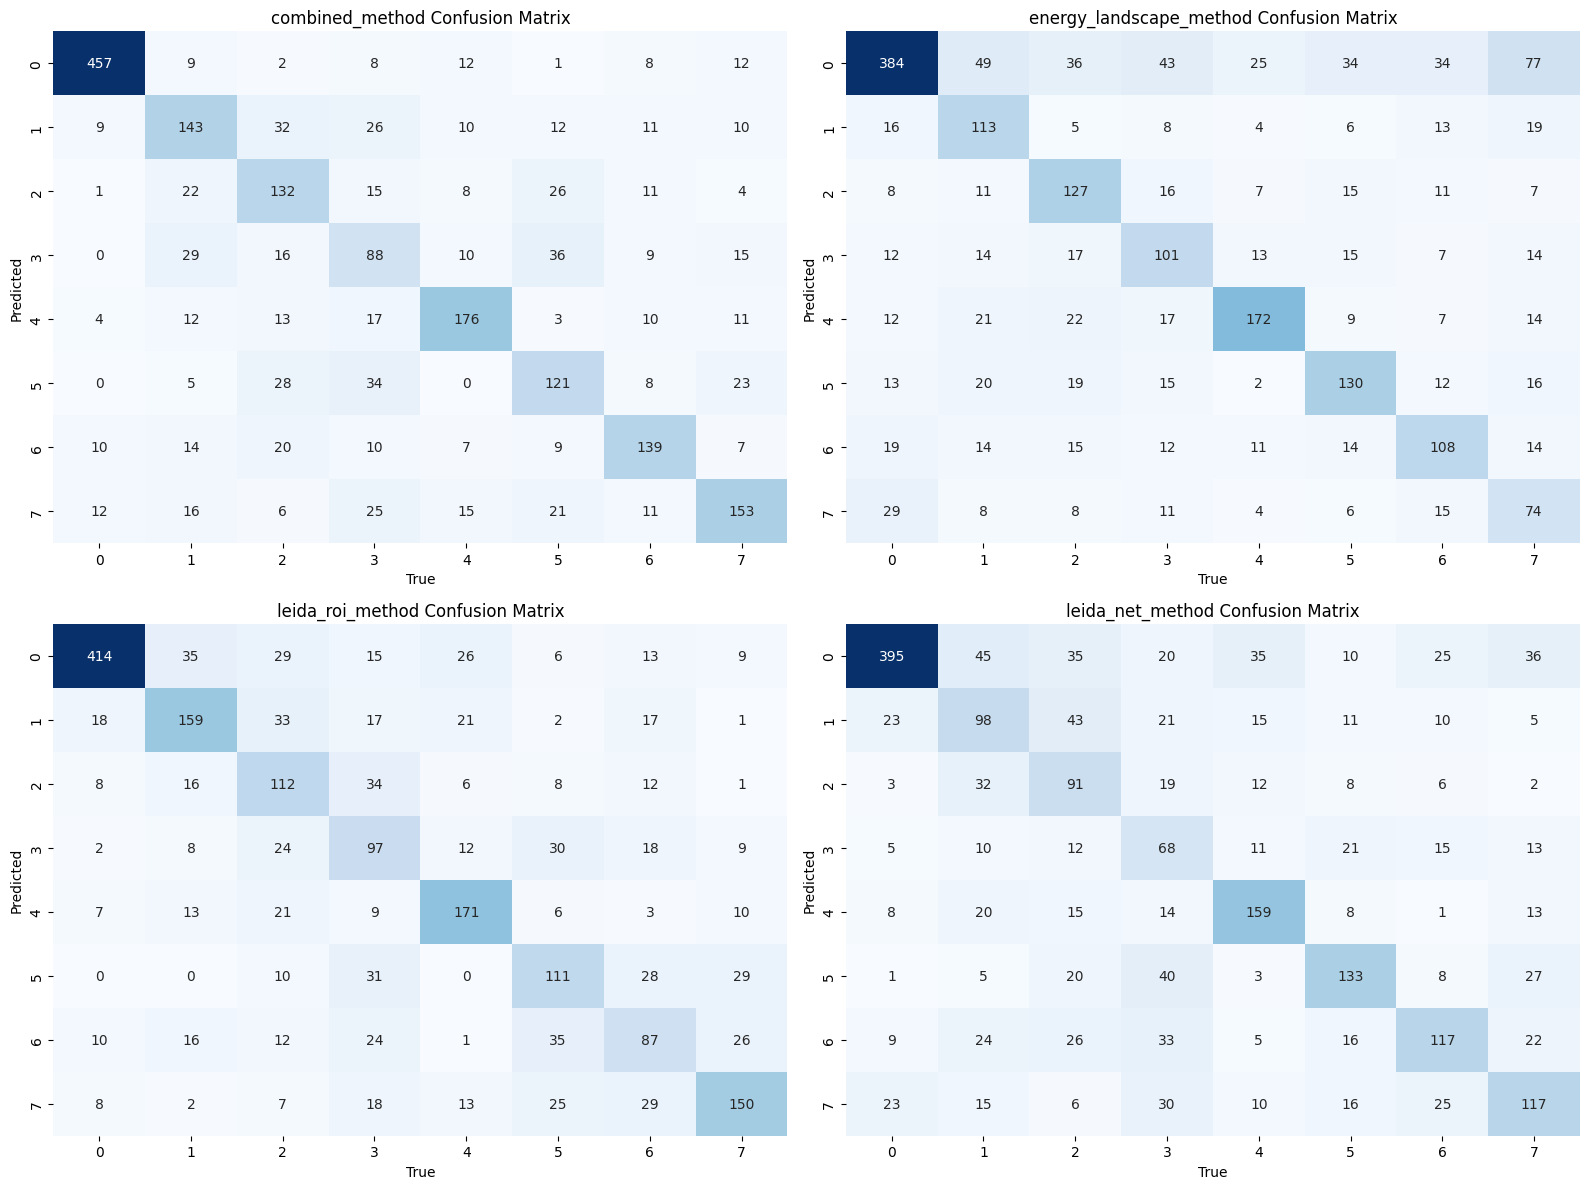

In [ ]:
##Task Classification
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(data_combined_method, y_extended, test_size=0.2, random_state=82)
X_train_leida_net, X_test_leida_net, y_train_leida_net, y_test_leida_net = train_test_split(data_leida_net, y_extended2, test_size=0.2, random_state=82)
X_train_leida_roi, X_test_leida_roi, y_train_leida_roi, y_test_leida_roi = train_test_split(data_leida_roi, y_extended2, test_size=0.2, random_state=82)
X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(data_energy_landscape, y_extended, test_size=0.2, random_state=82)

model_combined = RandomForestClassifier(n_estimators=100, random_state=82)
model_leida_net = RandomForestClassifier(n_estimators=100, random_state=82)
model_leida_roi = RandomForestClassifier(n_estimators=100, random_state=82)
model_energy = RandomForestClassifier(n_estimators=100, random_state=82)

model_combined.fit(X_train_combined, y_train_combined)
model_leida_net.fit(X_train_leida_net, y_train_leida_net)
model_leida_roi.fit(X_train_leida_roi, y_train_leida_roi)
model_energy.fit(X_train_energy, y_train_energy)

y_pred_combined = model_combined.predict(X_test_combined)
y_pred_proba_combined = model_combined.predict_proba(X_test_combined)[:, 1]  # 获取正类的概率

y_pred_leida_net = model_leida_net.predict(X_test_leida_net)
y_pred_proba_leida_net = model_leida_net.predict_proba(X_test_leida_net)[:, 1] 

y_pred_leida_roi = model_leida_roi.predict(X_test_leida_roi)
y_pred_proba_leida_roi = model_leida_roi.predict_proba(X_test_leida_roi)[:, 1] 

y_pred_energy = model_energy.predict(X_test_energy)
y_pred_proba_energy = model_energy.predict_proba(X_test_energy)[:, 1] 

accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
accuracy_leida_net = accuracy_score(y_test_leida_net, y_pred_leida_net)
accuracy_leida_roi = accuracy_score(y_test_leida_roi, y_pred_leida_roi)
accuracy_energy = accuracy_score(y_test_energy, y_pred_energy)
print(f"Combined Method Accuracy: {accuracy_combined:.2f}")
print(f"LEiDA_net Method Accuracy: {accuracy_leida_net:.2f}")
print(f"LEiDA_roi Method Accuracy: {accuracy_leida_roi:.2f}")
print(f"Energy Landscape Method Accuracy: {accuracy_energy:.2f}")

methods = ['Combined Method', 'LEiDA_roi Method', 'Energy Landscape Method', 'LEiDA_net Method']
accuracies = [accuracy_combined, accuracy_leida_roi, accuracy_energy, accuracy_leida_net]

plt.figure(figsize=(10, 12))
plt.subplot(2, 2, 1)
plt.bar(methods, accuracies, color=['#B7B7EB', '#9BBBE1', '#EAB883', '#F09BA0'])
plt.title('Accuracy Comparison of Different Methods')
# plt.xlabel('Methods')
# plt.ylabel('Accuracy')
plt.xticks(rotation=15)

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.4f}", ha='center')


cm1 = confusion_matrix(y_pred_combined, y_test_combined)
cm4 = confusion_matrix(y_pred_leida_net, y_test_leida_net)
cm2 = confusion_matrix(y_pred_leida_roi, y_test_leida_roi)
cm3 = confusion_matrix(y_pred_energy, y_test_energy)

cr1 = classification_report(y_test_combined, y_pred_combined, output_dict=True)
cr4 = classification_report(y_test_leida_net, y_pred_leida_net, output_dict=True)
cr2 = classification_report(y_test_leida_roi, y_pred_leida_roi, output_dict=True)
cr3 = classification_report(y_test_energy, y_pred_energy, output_dict=True)

precisions = [cr1['weighted avg']['precision'], cr2['weighted avg']['precision'], cr3['weighted avg']['precision'], cr4['weighted avg']['precision']]
recalls = [cr1['weighted avg']['recall'], cr2['weighted avg']['recall'], cr3['weighted avg']['recall'], cr4['weighted avg']['recall']]
f1_scores = [cr1['weighted avg']['f1-score'], cr2['weighted avg']['f1-score'], cr3['weighted avg']['f1-score'], cr4['weighted avg']['f1-score']]

plt.subplot(2, 2, 2)
plt.bar(methods, precisions, color=['#B7B7EB', '#9BBBE1', '#EAB883', '#F09BA0'])
plt.title('Precisions Comparison of Different Methods')
# plt.xlabel('Methods')
# plt.ylabel('Precisions')
plt.xticks(rotation=15)
for i, precision in enumerate(precisions):
    plt.text(i, precision + 0.01, f"{precision:.4f}", ha='center')

plt.subplot(2, 2, 3)
plt.bar(methods, recalls, color=['#B7B7EB', '#9BBBE1', '#EAB883', '#F09BA0'])
plt.title('Recalls Comparison of Different Methods')
# plt.xlabel('Methods')
# plt.ylabel('Recalls')
plt.xticks(rotation=15)
for i, recall in enumerate(recalls):
    plt.text(i, recall + 0.01, f"{recall:.4f}", ha='center')

plt.subplot(2, 2, 4)
plt.bar(methods, f1_scores, color=['#B7B7EB', '#9BBBE1', '#EAB883', '#F09BA0'])
plt.title('F1_scores Comparison of Different Methods')
# plt.xlabel('Methods')
# plt.ylabel('F1_scores')
plt.xticks(rotation=15)
for i, f1_score in enumerate(f1_scores):
    plt.text(i, f1_score + 0.01, f"{f1_score:.4f}", ha='center')
plt.tight_layout()
plt.show()

print("Confusion Matrix:")
print(cm1)
print("\nClassification Report:")
print(classification_report(y_pred_combined, y_test_combined))

plt.figure(figsize=(16, 12))
plt.subplot(2, 2, 1)
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('combined_method Confusion Matrix')

print("Confusion Matrix:")
print(cm4)
print("\nClassification Report:")
print(classification_report(y_pred_leida_net, y_test_leida_net))

plt.subplot(2, 2, 4)
sns.heatmap(cm4, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('leida_net_method Confusion Matrix')

print("Confusion Matrix:")
print(cm2)

print("\nClassification Report:")
print(classification_report(y_pred_leida_roi, y_test_leida_roi))

plt.subplot(2, 2, 3)
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('leida_roi_method Confusion Matrix')

print("Confusion Matrix:")
print(cm3)
print("\nClassification Report:")
print(classification_report(y_pred_energy, y_test_energy))

plt.subplot(2, 2, 2)
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('energy_landscape_method Confusion Matrix')
plt.tight_layout()
plt.show()

In [11]:
condition = ['motor', 'emotion', 'gambling', 'language', 'relational', 'social', 'wm']

occ_data3 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_LR/dynamics_metrics/k_7/occupancies.csv',sep='\t')
# dt_data3 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_LR/dynamics_metrics/k_7/dwell_times.csv',sep='\t')
# trans_data3 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_LR/dynamics_metrics/k_7/transitions_probabilities.csv',sep='\t')
# dt_data3 = dt_data3.drop(['subject_id','condition'], axis=1)
# trans_data3 = trans_data3.drop(['subject_id','condition'], axis=1)
# data3 = pd.concat([occ_data3,dt_data3,trans_data3], axis=1)
occ_data4 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_RL/dynamics_metrics/k_7/occupancies.csv',sep='\t')
# dt_data4 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_RL/dynamics_metrics/k_7/dwell_times.csv',sep='\t')
# trans_data4 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_RL/dynamics_metrics/k_7/transitions_probabilities.csv',sep='\t')
# dt_data4 = dt_data4.drop(['subject_id','condition'], axis=1)
# trans_data4 = trans_data4.drop(['subject_id','condition'], axis=1)
# data4 = pd.concat([occ_data4,dt_data4,trans_data4], axis=1)
# data_leida_roi = pd.concat([data3, data4], ignore_index=True)
data_leida_roi = pd.concat([occ_data3, occ_data4], ignore_index=True)
data_leida_roi['condition'] = data_leida_roi['condition'].replace({'rest1': 'rest', 'rest2': 'rest'})

occ_data1 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_LR_net/dynamics_metrics/k_7/occupancies.csv',sep='\t')
# dt_data1 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_LR_net/dynamics_metrics/k_7/dwell_times.csv',sep='\t')
# trans_data1 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_LR_net/dynamics_metrics/k_7/transitions_probabilities.csv',sep='\t')
# dt_data1 = dt_data1.drop(['subject_id','condition'], axis=1)
# trans_data1 = trans_data1.drop(['subject_id','condition'], axis=1)
# data1 = pd.concat([occ_data1,dt_data1,trans_data1], axis=1)
occ_data2 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_RL_net/dynamics_metrics/k_7/occupancies.csv',sep='\t')
# dt_data2 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_RL_net/dynamics_metrics/k_7/dwell_times.csv',sep='\t')
# trans_data2 = pd.read_csv(f'/data/dzy/combined_method/NET/LEiDA_results_RL_net/dynamics_metrics/k_7/transitions_probabilities.csv',sep='\t')
# dt_data2 = dt_data2.drop(['subject_id','condition'], axis=1)
# trans_data2 = trans_data2.drop(['subject_id','condition'], axis=1)
# data2 = pd.concat([occ_data2,dt_data2,trans_data2], axis=1)
# data_leida_net = pd.concat([data1, data2], ignore_index=True)
data_leida_net = pd.concat([occ_data1, occ_data2], ignore_index=True)
data_leida_net['condition'] = data_leida_net['condition'].replace({'rest1': 'rest', 'rest2': 'rest'})

data1_LR = pd.read_csv('/data/dzy/combined_method/结合方法/results_LR_net/Dynamics_ALL.csv')
data1_RL = pd.read_csv('/data/dzy/combined_method/结合方法/results_RL_net/Dynamics_ALL.csv')
data_combined_method = pd.concat([data1_LR, data1_RL], ignore_index=True)
data_combined_method = data_combined_method.loc[:,['condition', ' Frequency of B1',' Frequency of B2',' Frequency of B3',' Frequency of B4',' Frequency of B5',' Frequency of B6',' Frequency of B7',' Frequency of B8',' Frequency of B9',' Frequency of B10',' Frequency of B11',' Frequency of B12']]
data_combined_method['condition'] = data_combined_method['condition'].replace({'rest1': 'rest', 'rest2': 'rest'})

data2_LR = pd.read_csv('/data/dzy/combined_method/原始能量景观分析/results_LR//Dynamics_ALL.csv')
data2_RL = pd.read_csv('/data/dzy/combined_method/原始能量景观分析/results_RL//Dynamics_ALL.csv')
data_energy_landscape = pd.concat([data2_LR, data2_RL], ignore_index=True)
data_energy_landscape = data_energy_landscape.loc[:,['condition', ' Frequency of B1',' Frequency of B2',' Frequency of B3',' Frequency of B4']]
data_energy_landscape['condition'] = data_energy_landscape['condition'].replace({'rest1': 'rest', 'rest2': 'rest'})


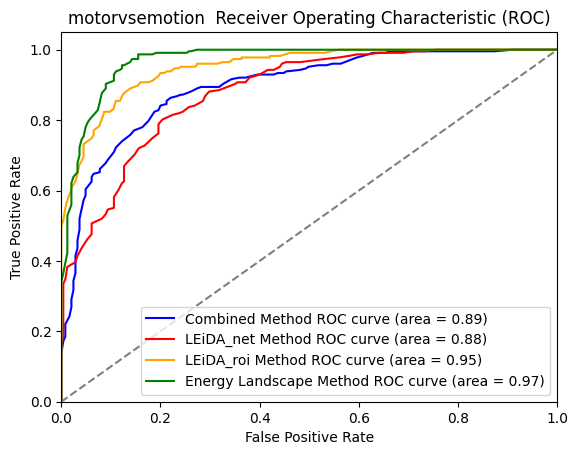

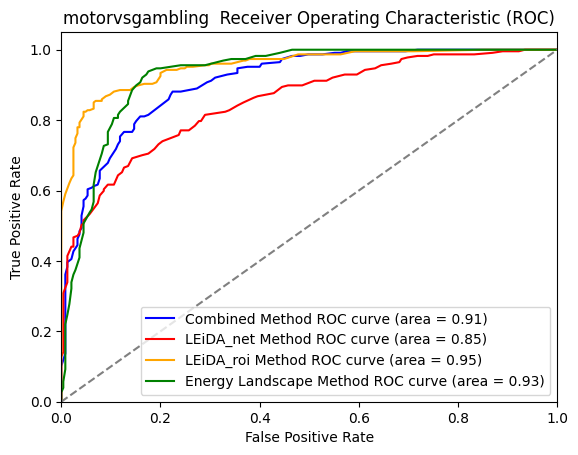

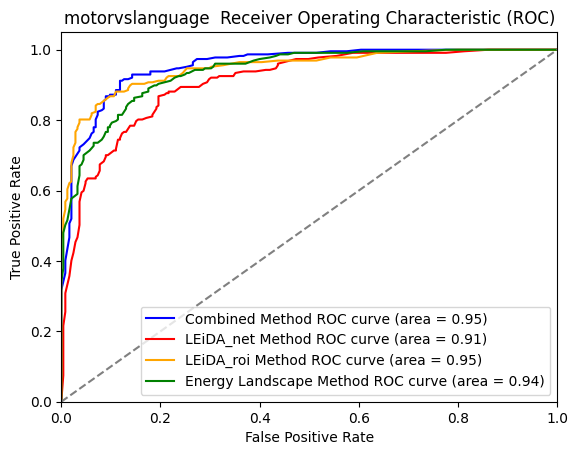

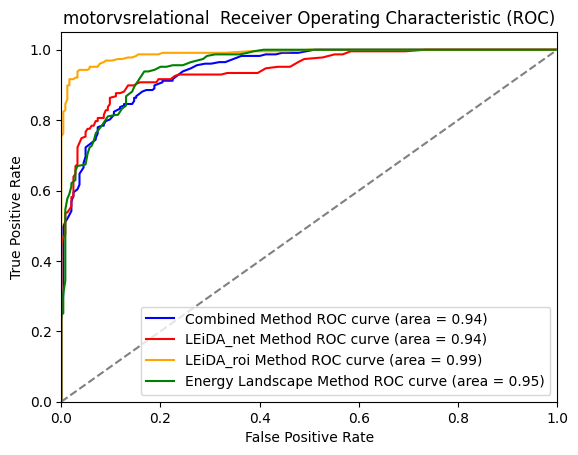

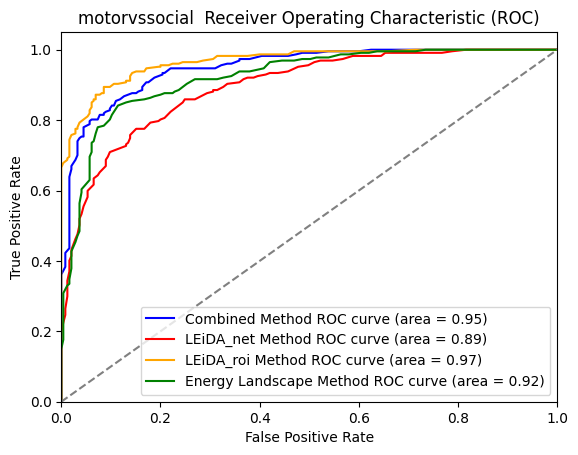

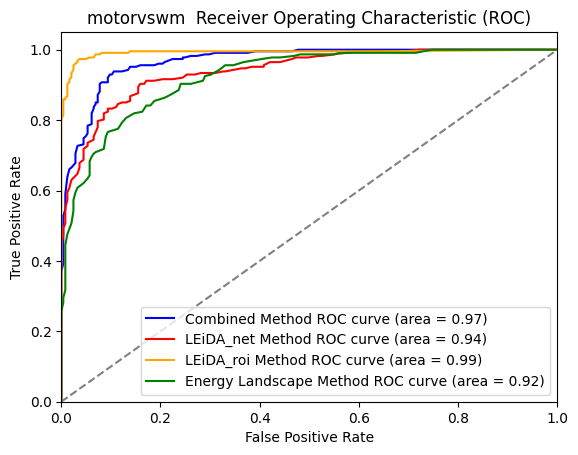

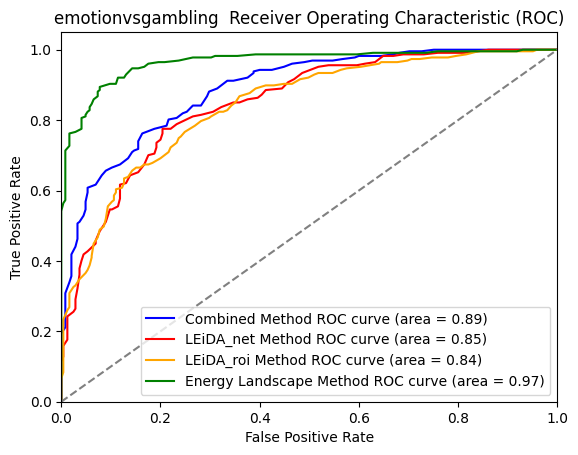

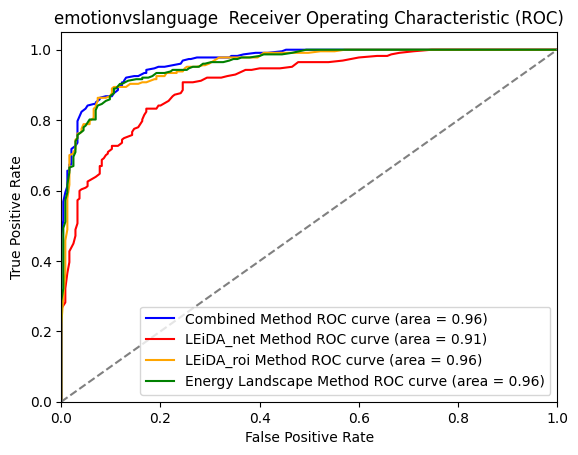

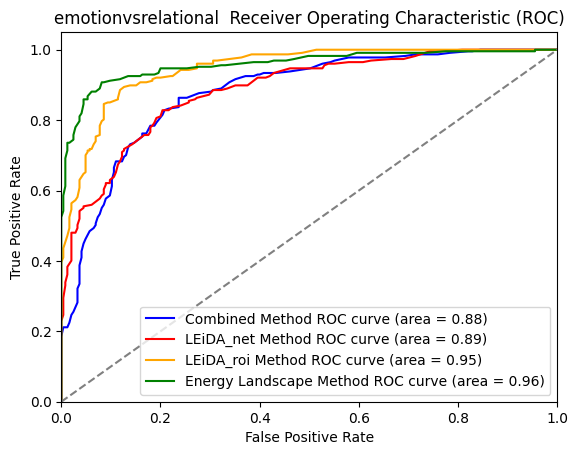

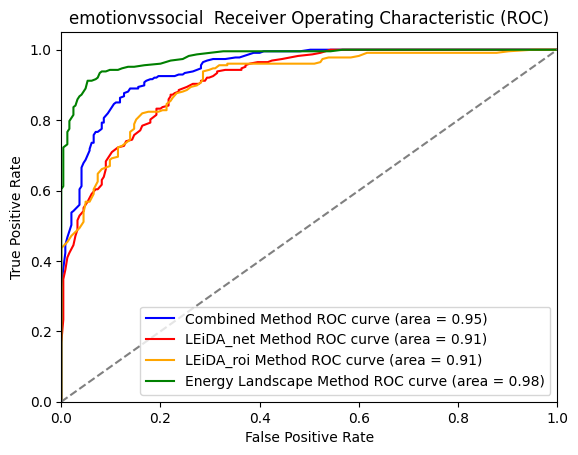

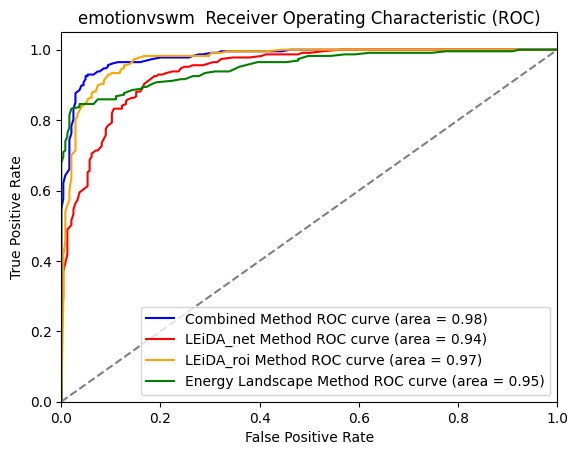

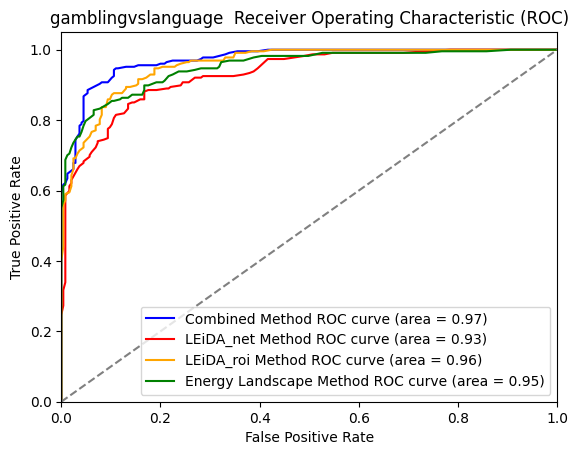

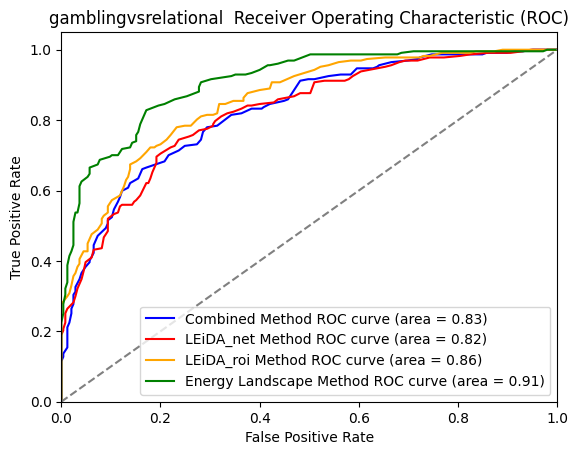

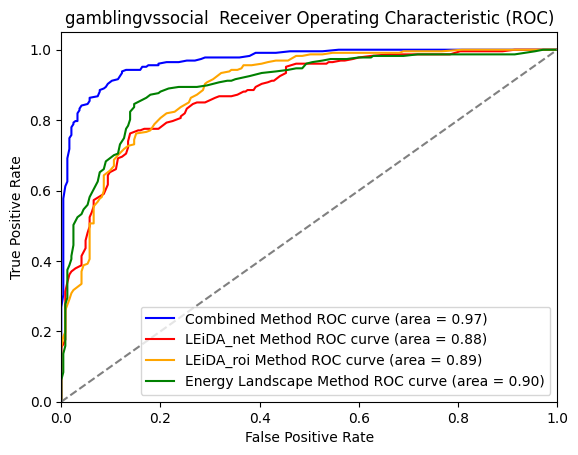

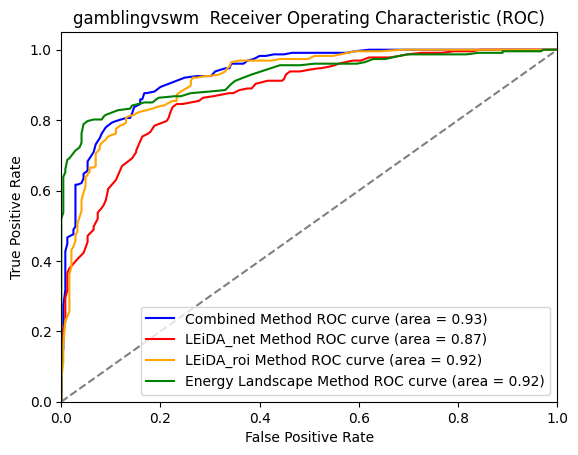

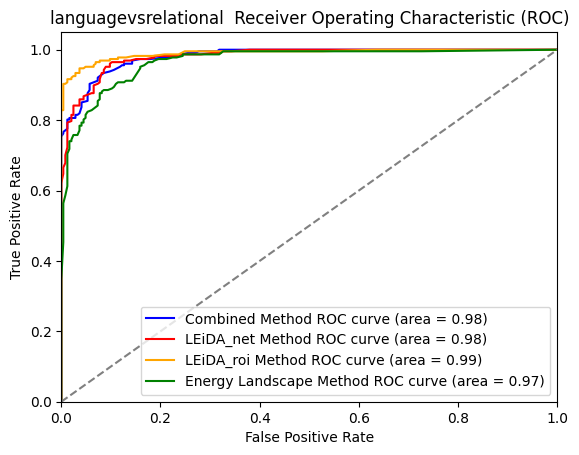

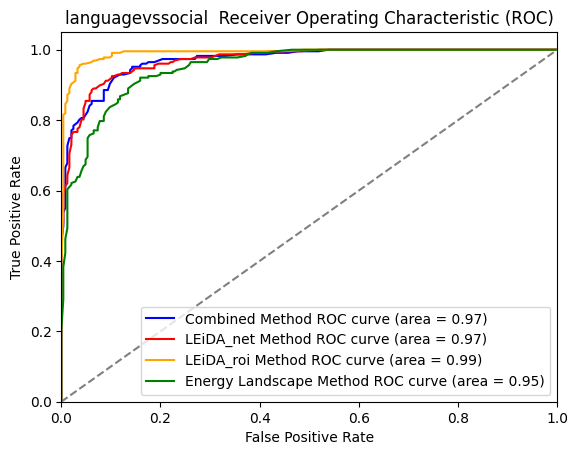

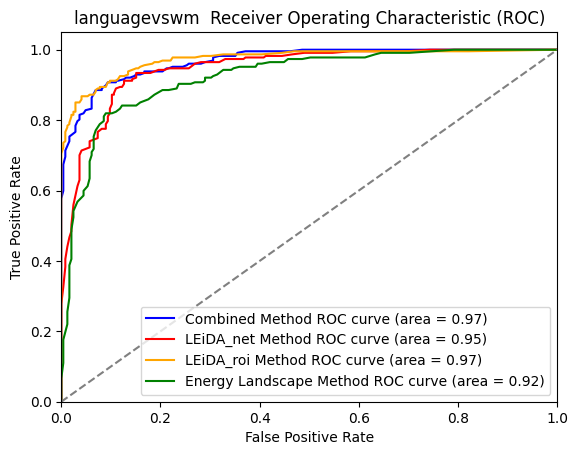

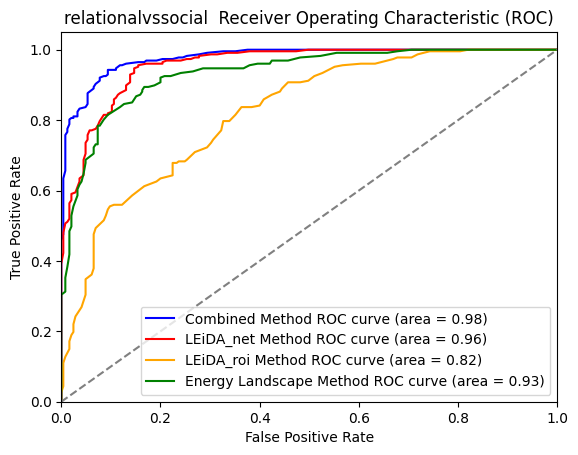

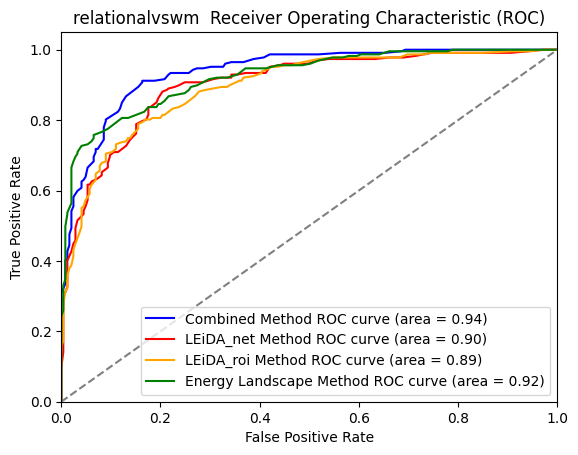

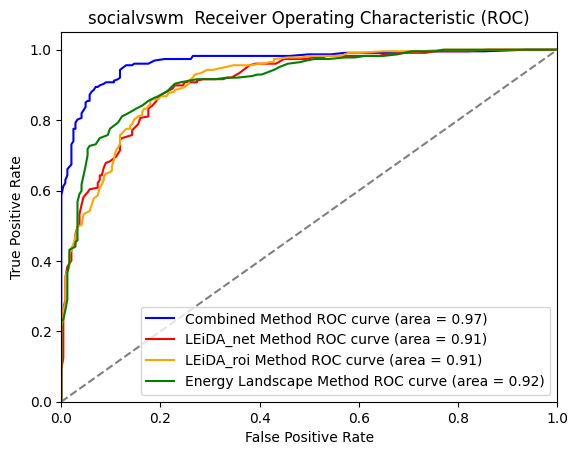

In [ ]:
y = np.array([0] * 1180 + [1] * 1180)
results = []
for condition1, condition2 in itertools.combinations(condition, 2):
    task1_leida_net = data_leida_net[data_leida_net['condition'] == condition1]
    task2_leida_net = data_leida_net[data_leida_net['condition'] == condition2]
    data_leida_task_net = pd.concat([task1_leida_net, task2_leida_net], ignore_index=True)
    data_leida_task_net = data_leida_task_net.drop(['subject_id','condition'], axis=1)
    
    task1_leida_roi = data_leida_roi[data_leida_roi['condition'] == condition1]
    task2_leida_roi = data_leida_roi[data_leida_roi['condition'] == condition2]
    data_leida_task_roi = pd.concat([task1_leida_roi, task2_leida_roi], ignore_index=True)
    data_leida_task_roi = data_leida_task_roi.drop(['subject_id','condition'], axis=1)
    
    task1_combined = data_combined_method[data_combined_method['condition'] == condition1]
    task2_combined = data_combined_method[data_combined_method['condition'] == condition2]
    data_combined_task = pd.concat([task1_combined, task2_combined], ignore_index=True)
    data_combined_task = data_combined_task.drop(['condition'], axis=1)
    data_combined_task = pd.DataFrame(data_combined_task, dtype=float)
    
    
    task1_energy = data_energy_landscape[data_energy_landscape['condition'] == condition1]
    task2_energy = data_energy_landscape[data_energy_landscape['condition'] == condition2]
    data_energy_task = pd.concat([task1_energy, task2_energy], ignore_index=True)
    data_energy_task = data_energy_task.drop(['condition'], axis=1)
    data_energy_task = pd.DataFrame(data_energy_task, dtype=float)
    
    
    X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(data_combined_task, y, test_size=0.2, random_state=42)
    X_train_leida_net, X_test_leida_net, y_train_leida_net, y_test_leida_net = train_test_split(data_leida_task_net, y, test_size=0.2, random_state=42)
    X_train_leida_roi, X_test_leida_roi, y_train_leida_roi, y_test_leida_roi = train_test_split(data_leida_task_roi, y, test_size=0.2, random_state=42)
    X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(data_energy_task, y, test_size=0.2, random_state=42)
   
    model_combined = RandomForestClassifier(n_estimators=100, random_state=42)
    model_leida_net = RandomForestClassifier(n_estimators=100, random_state=42)
    model_leida_roi = RandomForestClassifier(n_estimators=100, random_state=42)
    model_energy = RandomForestClassifier(n_estimators=100, random_state=42)

    model_combined.fit(X_train_combined, y_train_combined)
    model_leida_net.fit(X_train_leida_net, y_train_leida_net)
    model_leida_roi.fit(X_train_leida_roi, y_train_leida_roi)
    model_energy.fit(X_train_energy, y_train_energy)

    y_pred_combined = model_combined.predict(X_test_combined)
    y_pred_proba_combined = model_combined.predict_proba(X_test_combined)[:, 1]  # 获取正类的概率

    y_pred_leida_net = model_leida_net.predict(X_test_leida_net)
    y_pred_proba_leida_net = model_leida_net.predict_proba(X_test_leida_net)[:, 1] 

    y_pred_leida_roi = model_leida_roi.predict(X_test_leida_roi)
    y_pred_proba_leida_roi = model_leida_roi.predict_proba(X_test_leida_roi)[:, 1] 

    y_pred_energy = model_energy.predict(X_test_energy)
    y_pred_proba_energy = model_energy.predict_proba(X_test_energy)[:, 1] 

    accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
    accuracy_leida_net = accuracy_score(y_test_leida_net, y_pred_leida_net)
    accuracy_leida_roi = accuracy_score(y_test_leida_roi, y_pred_leida_roi)
    accuracy_energy = accuracy_score(y_test_energy, y_pred_energy)
#     print(f"{condition1}vs{condition2}  Combined Method Accuracy: {accuracy_combined:.4f}")
#     print(f"{condition1}vs{condition2}  LEiDA_net Method Accuracy: {accuracy_leida_net:.4f}")
#     print(f"{condition1}vs{condition2}  LEiDA_roi Method Accuracy: {accuracy_leida_roi:.4f}")
#     print(f"{condition1}vs{condition2}  Energy Landscape Method Accuracy: {accuracy_energy:.4f}")

 
    fpr_combined, tpr_combined, thresholds_combined = roc_curve(y_test_combined, y_pred_proba_combined)
    roc_auc_combined = auc(fpr_combined, tpr_combined)

    fpr_leida_net, tpr_leida_net, thresholds_leida_net = roc_curve(y_test_leida_net, y_pred_proba_leida_net)
    roc_auc_leida_net = auc(fpr_leida_net, tpr_leida_net)
    
    fpr_leida_roi, tpr_leida_roi, thresholds_leida_roi = roc_curve(y_test_leida_roi, y_pred_proba_leida_roi)
    roc_auc_leida_roi = auc(fpr_leida_roi, tpr_leida_roi)

    fpr_energy, tpr_energy, thresholds_energy = roc_curve(y_test_energy, y_pred_proba_energy)
    roc_auc_energy = auc(fpr_energy, tpr_energy)
    

#     print(f"{condition1}vs{condition2}  Combined Method Area Under Curve (AUC): {roc_auc_combined:.4f}")
#     print(f"{condition1}vs{condition2}  LEiDA_net Method Area Under Curve (AUC): {roc_auc_leida_net:.4f}")
#     print(f"{condition1}vs{condition2}  LEiDA_roi Method Area Under Curve (AUC): {roc_auc_leida_roi:.4f}")
#     print(f"{condition1}vs{condition2}  Energy Landscape Method Area Under Curve (AUC): {roc_auc_energy:.4f}")
    results.append({
        'task1':condition1,
        'task2':condition2,
        'combined_method_ACC':accuracy_combined,
        'leida_net_method_ACC':accuracy_leida_net,
        'leida_roi_method_ACC':accuracy_leida_roi,
        'energy_landscape_method_ACC':accuracy_energy,
        'combined_method_AUC':roc_auc_combined,
        'leida_net_method_AUC':roc_auc_leida_net,
        'leida_roi_method_AUC':roc_auc_leida_roi,
        'energy_landscape_method_AUC':roc_auc_energy
            })

    plt.figure()
    plt.plot(fpr_combined, tpr_combined, color='blue', label=f'Combined Method ROC curve (area = {roc_auc_combined:.2f})')
    plt.plot(fpr_leida_net, tpr_leida_net, color='red', label=f'LEiDA_net Method ROC curve (area = {roc_auc_leida_net:.2f})')
    plt.plot(fpr_leida_roi, tpr_leida_roi, color='orange', label=f'LEiDA_roi Method ROC curve (area = {roc_auc_leida_roi:.2f})')
    plt.plot(fpr_energy, tpr_energy, color='green', label=f'Energy Landscape Method ROC curve (area = {roc_auc_energy:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # 对角线
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{condition1}vs{condition2}  Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()
results = pd.DataFrame(results)
results.to_csv('./result_任务分类.csv',index=False)

In [ ]:
results_rest = []
y = np.array([0] * 2360 + [1] * 1180)
all_accuracies = []
all_std_accuracies = []
results = []
for condition1 in condition:
    task1_leida_net = data_leida_net[data_leida_net['condition'] == 'rest']
    task2_leida_net = data_leida_net[data_leida_net['condition'] == condition1]
    data_leida_task_net = pd.concat([task1_leida_net, task2_leida_net], ignore_index=True)
    data_leida_task_net = data_leida_task_net.drop(['subject_id','condition'], axis=1)
    
    task1_leida_roi = data_leida_roi[data_leida_roi['condition'] == 'rest']
    task2_leida_roi = data_leida_roi[data_leida_roi['condition'] == condition1]
    data_leida_task_roi = pd.concat([task1_leida_roi, task2_leida_roi], ignore_index=True)
    data_leida_task_roi = data_leida_task_roi.drop(['subject_id','condition'], axis=1)
    
    task1_combined = data_combined_method[data_combined_method['condition'] == 'rest']
    task2_combined = data_combined_method[data_combined_method['condition'] == condition1]
    data_combined_task = pd.concat([task1_combined, task2_combined], ignore_index=True)
    data_combined_task = data_combined_task.drop(['condition'], axis=1)
    data_combined_task = pd.DataFrame(data_combined_task, dtype=float)
    
    
    task1_energy = data_energy_landscape[data_energy_landscape['condition'] == 'rest']
    task2_energy = data_energy_landscape[data_energy_landscape['condition'] == condition1]
    data_energy_task = pd.concat([task1_energy, task2_energy], ignore_index=True)
    data_energy_task = data_energy_task.drop(['condition'], axis=1)
    data_energy_task = pd.DataFrame(data_energy_task, dtype=float)
    
    
#     X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(data_combined_task, y, test_size=0.2, random_state=42)
#     X_train_leida_net, X_test_leida_net, y_train_leida_net, y_test_leida_net = train_test_split(data_leida_task_net, y, test_size=0.2, random_state=42)
#     X_train_leida_roi, X_test_leida_roi, y_train_leida_roi, y_test_leida_roi = train_test_split(data_leida_task_roi, y, test_size=0.2, random_state=42)
#     X_train_energy, X_test_energy, y_train_energy, y_test_energy = train_test_split(data_energy_task, y, test_size=0.2, random_state=42)

    model_combined = RandomForestClassifier(n_estimators=100, random_state=52)
    model_leida_net = RandomForestClassifier(n_estimators=100, random_state=52)
    model_leida_roi = RandomForestClassifier(n_estimators=100, random_state=52)
    model_energy = RandomForestClassifier(n_estimators=100, random_state=52)
    
    acc_combined = cross_val_score(model_combined, data_combined_task, y, cv=10,scoring='accuracy')
    acc_leida_net = cross_val_score(model_leida_net, data_leida_task_net, y, cv=10,scoring='accuracy')
    acc_leida_roi = cross_val_score(model_leida_roi,data_leida_task_roi, y, cv=10,scoring='accuracy')
    acc_energy = cross_val_score(model_energy, data_energy_task, y, cv=10,scoring='accuracy')
    
    
    accuracies = [np.mean(scores) for scores in [acc_combined, acc_leida_roi, acc_leida_net, acc_energy]]
    std_accuracies = [np.std(scores) for scores in [acc_combined, acc_leida_roi, acc_leida_net, acc_energy]]
    all_accuracies.append(accuracies)
    all_std_accuracies.append(std_accuracies)
    
    for model_name, accuracies in zip(['EMSA', 'Leida_roi', 'Leida_net', 'ELA'],
                                      [acc_combined, acc_leida_roi, acc_leida_net, acc_energy]):
        for acc in accuracies:
            results.append({'Condition': condition1, 'Model': model_name, 'Accuracy': acc})


df = pd.DataFrame(results)

print(all_accuracies)
print(all_std_accuracies)
#     # std_scores = [np.std(scores) for scores in [scores_combined, scores_leida_roi, scores_leida_net, scores_energy]]
#     methods = ['Combined Method', 'LEiDA_roi Method', 'LEiDA_net Method', 'Energy Landscape Method']
#     plt.figure(figsize=(4, 6))  


#     plt.bar(methods, accuracies, color=['#B7B7EB', '#9BBBE1', '#EAB883', '#F09BA0'], yerr=std_accuracies, capsize=5)
#     plt.title('Accuracy')
#     plt.xticks(rotation=30) 
#     plt.show()
    

#     model_combined.fit(X_train_combined, y_train_combined)
#     model_leida_net.fit(X_train_leida_net, y_train_leida_net)
#     model_leida_roi.fit(X_train_leida_roi, y_train_leida_roi)
#     model_energy.fit(X_train_energy, y_train_energy)

#     y_pred_combined = model_combined.predict(X_test_combined)
#     y_pred_proba_combined = model_combined.predict_proba(X_test_combined)[:, 1]

#     y_pred_leida_net = model_leida_net.predict(X_test_leida_net)
#     y_pred_proba_leida_net = model_leida_net.predict_proba(X_test_leida_net)[:, 1] 

#     y_pred_leida_roi = model_leida_roi.predict(X_test_leida_roi)
#     y_pred_proba_leida_roi = model_leida_roi.predict_proba(X_test_leida_roi)[:, 1] 

#     y_pred_energy = model_energy.predict(X_test_energy)
#     y_pred_proba_energy = model_energy.predict_proba(X_test_energy)[:, 1] 

#     accuracy_combined = accuracy_score(y_test_combined, y_pred_combined)
#     accuracy_leida_net = accuracy_score(y_test_leida_net, y_pred_leida_net)
#     accuracy_leida_roi = accuracy_score(y_test_leida_roi, y_pred_leida_roi)
#     accuracy_energy = accuracy_score(y_test_energy, y_pred_energy)
# #     print(f"{condition1}vs{condition2}  Combined Method Accuracy: {accuracy_combined:.4f}")
# #     print(f"{condition1}vs{condition2}  LEiDA_net Method Accuracy: {accuracy_leida_net:.4f}")
# #     print(f"{condition1}vs{condition2}  LEiDA_roi Method Accuracy: {accuracy_leida_roi:.4f}")
# #     print(f"{condition1}vs{condition2}  Energy Landscape Method Accuracy: {accuracy_energy:.4f}")


#     fpr_combined, tpr_combined, thresholds_combined = roc_curve(y_test_combined, y_pred_proba_combined)
#     roc_auc_combined = auc(fpr_combined, tpr_combined)

#     fpr_leida_net, tpr_leida_net, thresholds_leida_net = roc_curve(y_test_leida_net, y_pred_proba_leida_net)
#     roc_auc_leida_net = auc(fpr_leida_net, tpr_leida_net)
    
#     fpr_leida_roi, tpr_leida_roi, thresholds_leida_roi = roc_curve(y_test_leida_roi, y_pred_proba_leida_roi)
#     roc_auc_leida_roi = auc(fpr_leida_roi, tpr_leida_roi)

#     fpr_energy, tpr_energy, thresholds_energy = roc_curve(y_test_energy, y_pred_proba_energy)
#     roc_auc_energy = auc(fpr_energy, tpr_energy)
    

# #     print(f"{condition1}vs{condition2}  Combined Method Area Under Curve (AUC): {roc_auc_combined:.4f}")
# #     print(f"{condition1}vs{condition2}  LEiDA_net Method Area Under Curve (AUC): {roc_auc_leida_net:.4f}")
# #     print(f"{condition1}vs{condition2}  LEiDA_roi Method Area Under Curve (AUC): {roc_auc_leida_roi:.4f}")
# #     print(f"{condition1}vs{condition2}  Energy Landscape Method Area Under Curve (AUC): {roc_auc_energy:.4f}")
#     results_rest.append({
#         'task1':'rest',
#         'task2':condition1,
#         'combined_method_ACC':accuracy_combined,
#         'leida_net_method_ACC':accuracy_leida_net,
#         'leida_roi_method_ACC':accuracy_leida_roi,
#         'energy_landscape_method_ACC':accuracy_energy,
#         'combined_method_AUC':roc_auc_combined,
#         'leida_net_method_AUC':roc_auc_leida_net,
#         'leida_roi_method_AUC':roc_auc_leida_roi,
#         'energy_landscape_method_AUC':roc_auc_energy
#             })

#     plt.figure()
#     plt.plot(fpr_combined, tpr_combined, color='blue', label=f'Combined Method ROC curve (area = {roc_auc_combined:.2f})')
#     plt.plot(fpr_leida_net, tpr_leida_net, color='red', label=f'LEiDA_net Method ROC curve (area = {roc_auc_leida_net:.2f})')
#     plt.plot(fpr_leida_roi, tpr_leida_roi, color='orange', label=f'LEiDA_roi Method ROC curve (area = {roc_auc_leida_roi:.2f})')
#     plt.plot(fpr_energy, tpr_energy, color='green', label=f'Energy Landscape Method ROC curve (area = {roc_auc_energy:.2f})')
#     plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title(f'rest vs {condition1}  Receiver Operating Characteristic (ROC)')
#     plt.legend(loc="lower right")
#     plt.show()
# results_rest = pd.DataFrame(results_rest)
# results_rest.to_csv('./result_rest_任务分类.csv',index=False)

[[0.9581920903954803, 0.9031073446327683, 0.8864406779661017, 0.8850282485875706], [0.9884180790960452, 0.9327683615819209, 0.9336158192090395, 0.9387005649717516], [0.9748587570621469, 0.93954802259887, 0.9172316384180791, 0.8997175141242938], [0.9576271186440678, 0.923728813559322, 0.9180790960451978, 0.9214689265536723], [0.985593220338983, 0.9675141242937852, 0.9590395480225988, 0.91864406779661], [0.9615819209039549, 0.931638418079096, 0.9155367231638418, 0.8867231638418079], [0.9533898305084746, 0.9525423728813559, 0.890677966101695, 0.8290960451977402]]
[[0.012429378531073426, 0.010797466018992298, 0.02237887267834843, 0.011921439461022152], [0.002664966421484944, 0.013827387853695408, 0.01501433024397551, 0.010648630974559778], [0.00542637647240071, 0.020727611669880384, 0.01899389319097653, 0.02626511077305724], [0.021063674443285014, 0.025921061575038342, 0.04030747792482932, 0.03874899028131581], [0.0064971751412429245, 0.00659469916945126, 0.007710363877941332, 0.0182984573

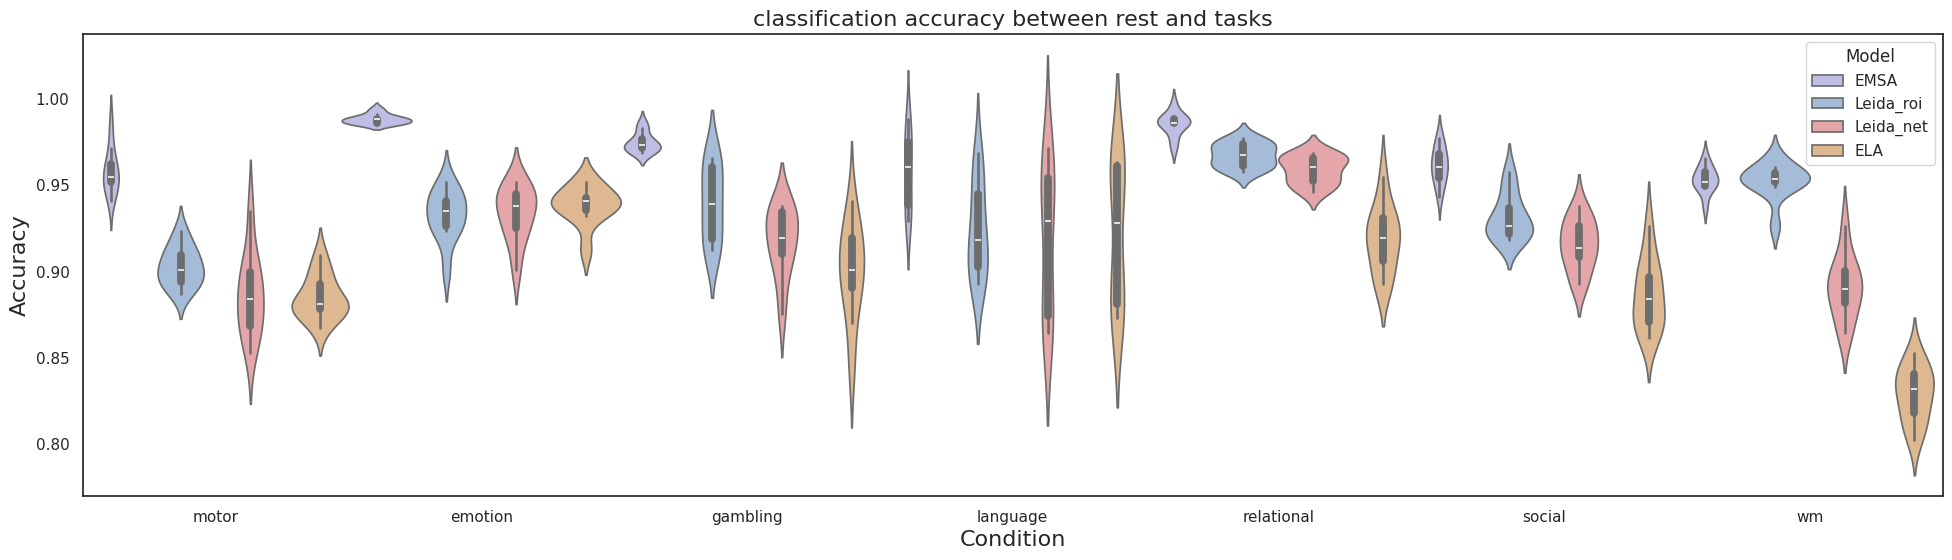

In [ ]:

sns.set(style="white")
custom_colors = ['#B7B7EB', '#9BBBE1', '#F09BA0', '#EAB883'] 
plt.figure(figsize=(24, 6))
sns.violinplot(x='Condition', y='Accuracy', hue='Model', data=df, palette=custom_colors, width=1.05)

plt.title('classification accuracy between rest and tasks', fontsize=16)
plt.xlabel('Condition', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
# plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# output_path = 'violin_plot_conditions.png'
plt.savefig('/data/dzy/combined_method/figure/accuracy_rest_tasks.png', dpi=500)
plt.show()


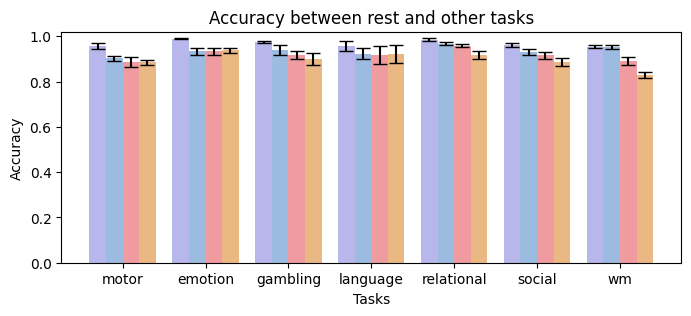

In [ ]:
condition = ['motor', 'emotion', 'gambling', 'language', 'relational', 'social', 'wm']
N = len(condition) 
ind = np.arange(N)  
width = 0.2 

fig, ax = plt.subplots(figsize=(8, 3))

methods = ['EMSA', 'LEiDA_roi', 'LEiDA_net', 'ELA']
colors = ['#B7B7EB', '#9BBBE1', '#F09BA0', '#EAB883']

for i in range(len(methods)):
    ax.bar(ind - 3 * width / 2 + i * width, [acc[i] for acc in all_accuracies], width, 
           yerr=[std[i] for std in all_std_accuracies], label=methods[i], capsize=5, color=colors[i])

ax.set_xlabel('Tasks')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy between rest and other tasks')
ax.set_xticks(ind)
ax.set_xticklabels(condition)
ax.set_ylim([0,1.02])
# ax.legend()

plt.show()

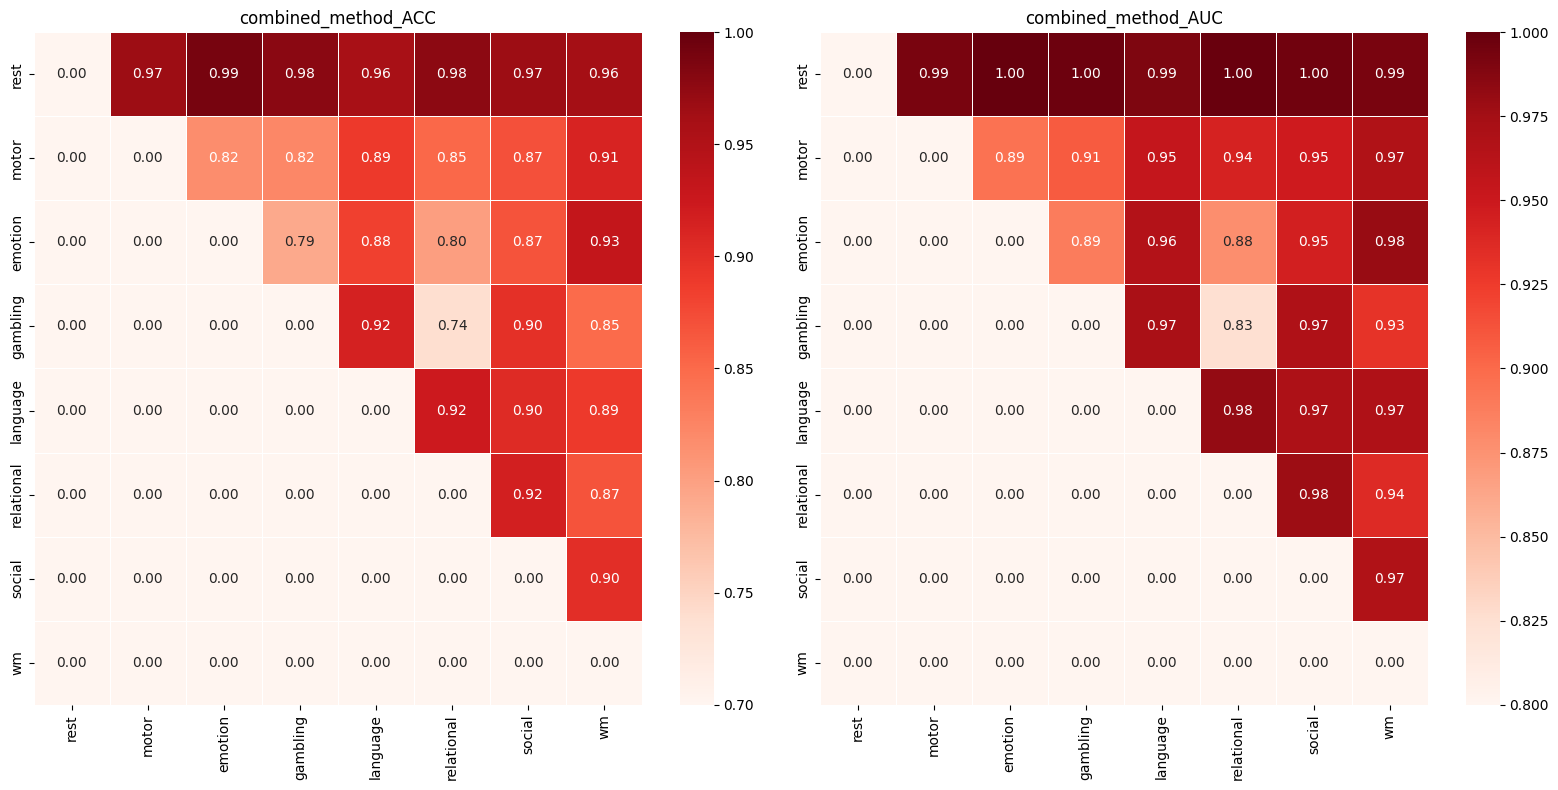

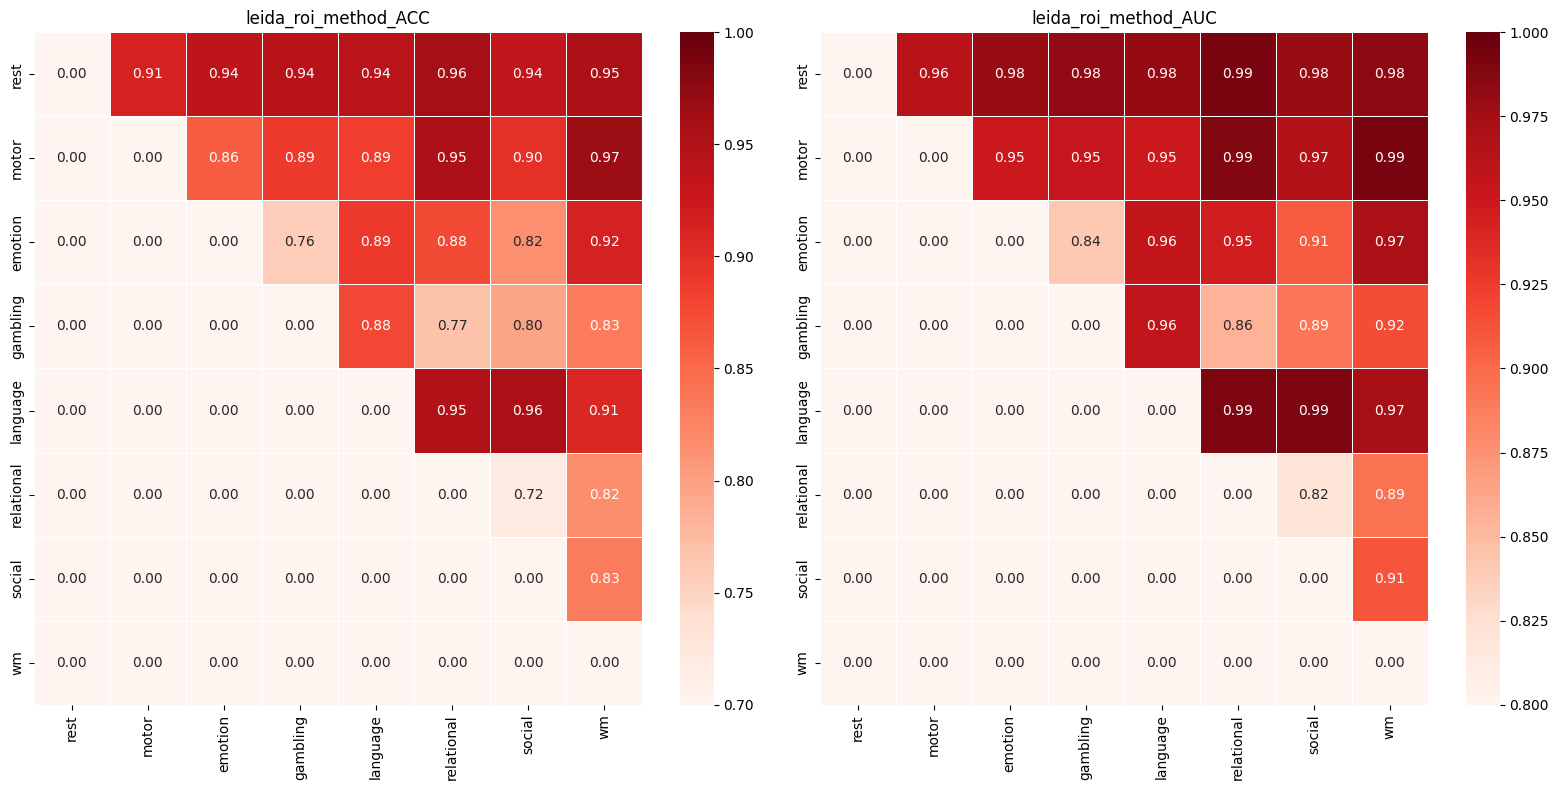

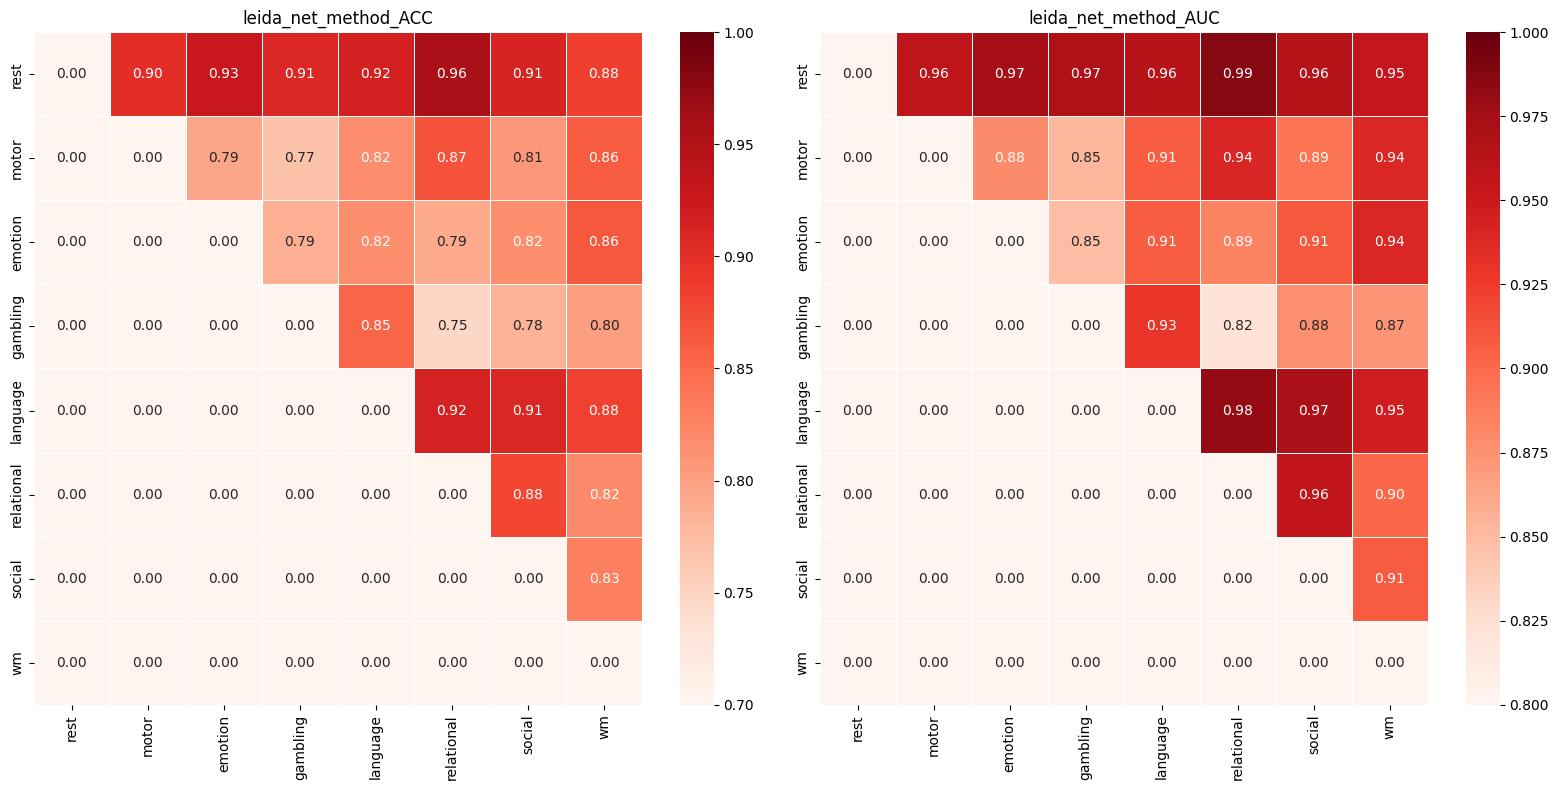

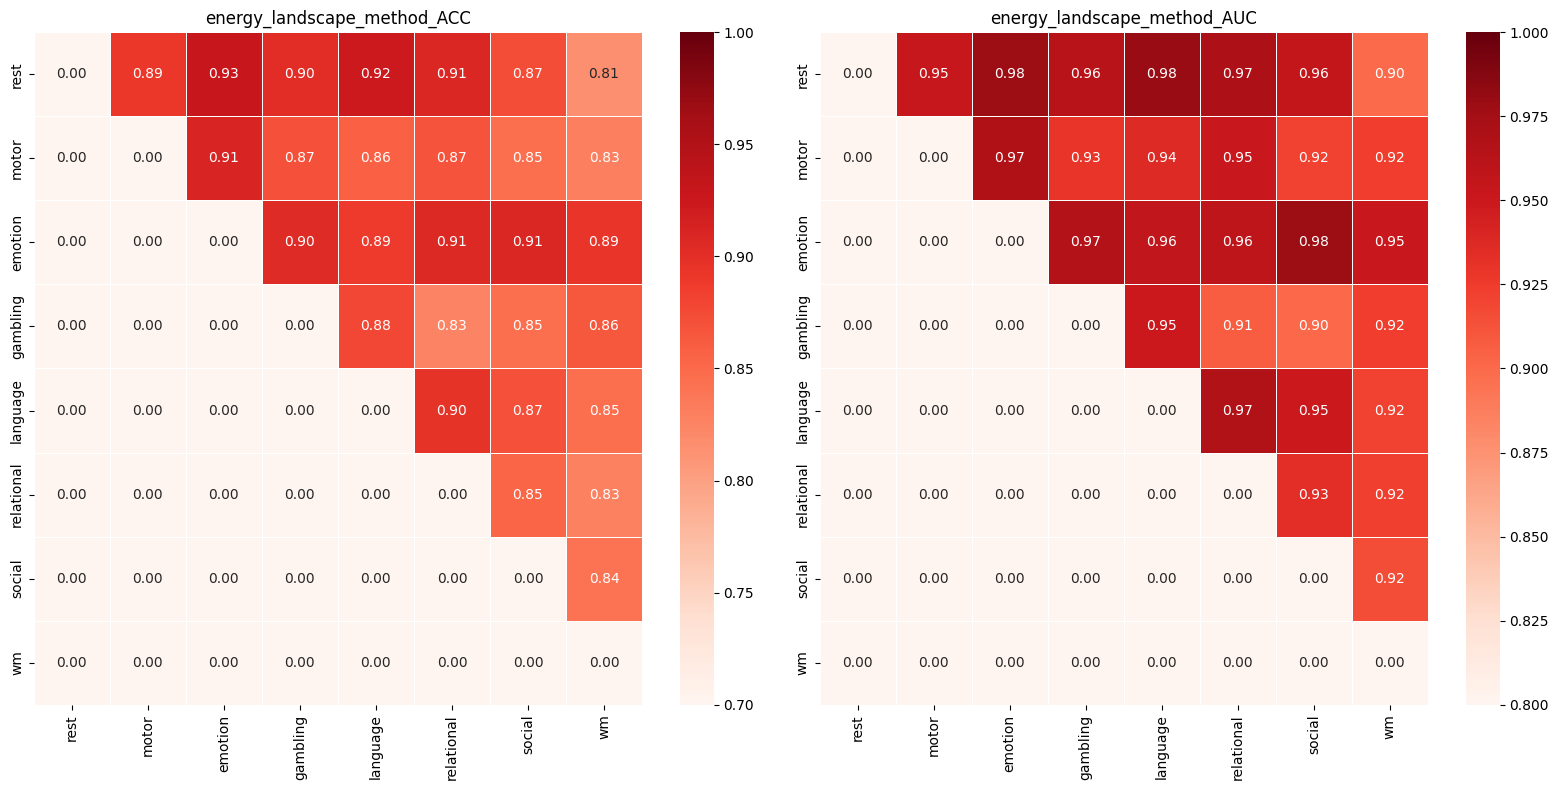

In [ ]:
condition = ['rest', 'motor', 'emotion', 'gambling', 'language', 'relational', 'social', 'wm']
matrix1 = np.zeros((len(condition), len(condition)))
matrix2 = np.zeros((len(condition), len(condition)))
data1 = pd.read_csv('./result_rest_任务分类.csv')
data2 = pd.read_csv('./result_任务分类.csv')
data = pd.concat([data1,data2], ignore_index=True)
data.to_csv('./result_all_任务分类.csv',index=False)
methods = ['combined_method', 'leida_roi_method', 'leida_net_method', 'energy_landscape_method']
# print(data)

for method in methods:
    for index, row in data.iterrows():
        matrix1[condition.index(row['task1']), condition.index(row['task2'])] = row[f'{method}_ACC']
        matrix2[condition.index(row['task1']), condition.index(row['task2'])] = row[f'{method}_AUC']

    df1 = pd.DataFrame(matrix1, index=condition, columns=condition)
    df2 = pd.DataFrame(matrix2, index=condition, columns=condition)

    fig, axs = plt.subplots(1, 2, figsize=(16, 8))

    vmin = 0.7
    vmin1 = 0.8
    vmax=1

    sns.heatmap(df1, annot=True, cmap='Reds', fmt=".2f", linewidths=.5, ax=axs[0],vmin=vmin, vmax=vmax,cbar=True)
    axs[0].set_title(f'{method}_ACC')  


    sns.heatmap(df2, annot=True, cmap='Reds', fmt=".2f", linewidths=.5, ax=axs[1],vmin=vmin1, vmax=vmax,cbar=True)
    axs[1].set_title(f'{method}_AUC')  

    plt.tight_layout()
    plt.show()

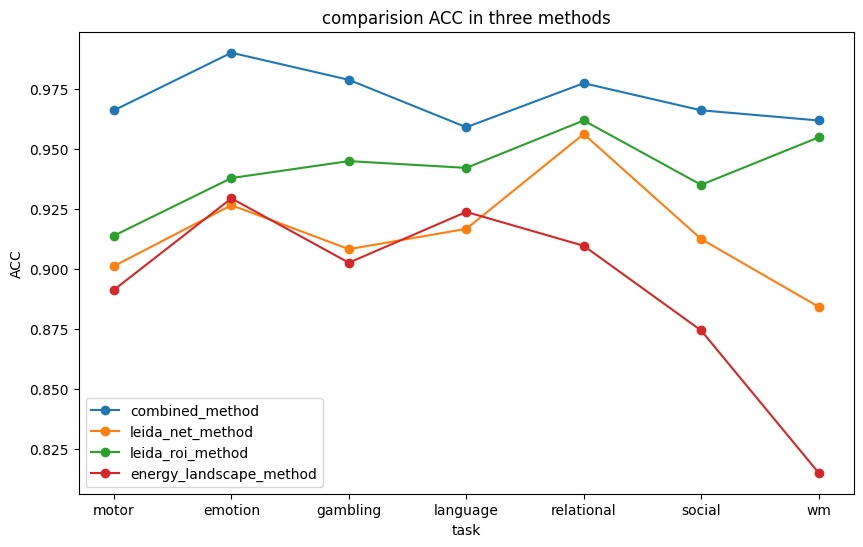

In [ ]:

data_task = data[data['task1'] == 'rest']
plt.figure(figsize=(10, 6)) 
index = data_task.iloc[:,1]
plt.plot(index, data_task.iloc[:,2], marker='o',label='combined_method') 
plt.plot(index, data_task.iloc[:,3], marker='o',label='leida_net_method') 
plt.plot(index, data_task.iloc[:,4], marker='o',label='leida_roi_method') 
plt.plot(index, data_task.iloc[:,5], marker='o',label='energy_landscape_method') 
plt.xticks(index)

plt.title('comparision ACC in three methods')
plt.xlabel('task')
plt.ylabel('ACC')
# for i, (x, y) in enumerate(zip(range(2, 21), mnr_matrix_roi[0])):
#     plt.text(x, y, f'{y:.4f}', ha='center', va='bottom')
plt.legend()
plt.show()